<a href="https://colab.research.google.com/github/zacharyvunguyen/End-to-End-Heart-Disease-Classification/blob/main/Final_Model_sep27_Precall_1_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pycaret for Heart Disease Classification 

## Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Data Pre-Processing

### Import data from csv file

In [3]:
heart_df = pd.read_csv("/content/drive/MyDrive/0_data_science/heart_disease/heart_statlog_cleveland_hungary_final.csv")

In [4]:
heart_df.head(5).transpose()

0      1      2      3      4
age                   40.0   49.0   37.0   48.0   54.0
sex                    1.0    0.0    1.0    0.0    1.0
chest pain type        2.0    3.0    2.0    4.0    3.0
resting bp s         140.0  160.0  130.0  138.0  150.0
cholesterol          289.0  180.0  283.0  214.0  195.0
fasting blood sugar    0.0    0.0    0.0    0.0    0.0
resting ecg            0.0    0.0    1.0    0.0    0.0
max heart rate       172.0  156.0   98.0  108.0  122.0
exercise angina        0.0    0.0    0.0    1.0    0.0
oldpeak                0.0    1.0    0.0    1.5    0.0
ST slope               1.0    2.0    1.0    2.0    1.0
target                 0.0    1.0    0.0    1.0    0.0

In [5]:
heart_df.describe().transpose()

count        mean         std   min    25%    50%  \
age                  1190.0   53.720168    9.358203  28.0   47.0   54.0   
sex                  1190.0    0.763866    0.424884   0.0    1.0    1.0   
chest pain type      1190.0    3.232773    0.935480   1.0    3.0    4.0   
resting bp s         1190.0  132.153782   18.368823   0.0  120.0  130.0   
cholesterol          1190.0  210.363866  101.420489   0.0  188.0  229.0   
fasting blood sugar  1190.0    0.213445    0.409912   0.0    0.0    0.0   
resting ecg          1190.0    0.698319    0.870359   0.0    0.0    0.0   
max heart rate       1190.0  139.732773   25.517636  60.0  121.0  140.5   
exercise angina      1190.0    0.387395    0.487360   0.0    0.0    0.0   
oldpeak              1190.0    0.922773    1.086337  -2.6    0.0    0.6   
ST slope             1190.0    1.624370    0.610459   0.0    1.0    2.0   
target               1190.0    0.528571    0.499393   0.0    0.0    1.0   

                        75%    max  
age                   60.00   77.0  
sex                    1.00    1.0  
chest pain type        4.00    4.0  
resting bp s         140.00  200.0  
cholesterol          269.75  603.0  
fasting blood sugar    0.00    1.0  
resting ecg            2.00    2.0  
max heart rate       160.00  202.0  
exercise angina        1.00    1.0  
oldpeak                1.60    6.2  
ST slope               2.00    3.0  
target                 1.00    1.0

In [6]:
#heart_df.info()

### Rename columns 

In [7]:
# renaming features to proper name
heart_df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope','HeartDisease']

In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1190 non-null   int64  
 1   Sex             1190 non-null   int64  
 2   ChestPainType   1190 non-null   int64  
 3   RestingBP       1190 non-null   int64  
 4   Cholesterol     1190 non-null   int64  
 5   FastingBS       1190 non-null   int64  
 6   RestingECG      1190 non-null   int64  
 7   MaxHR           1190 non-null   int64  
 8   ExerciseAngina  1190 non-null   int64  
 9   Oldpeak         1190 non-null   float64
 10  ST_Slope        1190 non-null   int64  
 11  HeartDisease    1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### Check unique values in each columns

In [9]:
def print_in_color(txt_msg,fore_tupple=(248, 252, 3),back_tupple=(100,100,100)):
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return
#msg='test of default colors'
#print_in_color(msg)

In [10]:
#heart_df.columns

Counting and displaying number of unique values for each column: 

In [11]:
for col in heart_df.columns:
  print_in_color(f'Unique values of {col} column: {heart_df[col].nunique()}')
  print(f'\n{heart_df[col].unique()}\n ********************* \n')

Unique values of Age column: 50


[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
 ********************* 

Unique values of Sex column: 2


[1 0]
 ********************* 

Unique values of ChestPainType column: 4


[2 3 4 1]
 ********************* 

Unique values of RestingBP column: 67


[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
 ********************* 

Unique values of Cholesterol column: 222


[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 

### Rename all the values within columns for better EDA


**Sex: sex of the patient**
  * M: 1
  * F: 0


In [12]:
heart_df["Sex"] = heart_df.Sex.apply(lambda  x:'M' if x==1 else 'F')

**ChestPainType: chest pain type:**
  * TA: typical angina - 1
  * ATA: atypical angina - 2
  * NAP: non-anginal pain - 3
  * ASY: asymptomatic - 4



In [13]:
heart_df['ChestPainType'] = heart_df['ChestPainType'].map({1: 'TA', 2: 'ATA', 3: 'NAP',4: 'ASY'})

**Resting electrocardiographic measurement**
  * Normal: Normal - 0
  * ST: having ST-T wave abnormality (T wave inversions and/or ST elevation   or depression of > 0.05 mV) - 1
  * LVH: showing probable or definite left ventricular hypertrophy by Estes'  criteria - 2


In [14]:
heart_df['RestingECG'] = heart_df['RestingECG'].map({0: 'Normal', 1: 'ST', 2: 'LVH'})

**The slope of the peak exercise ST segment**
  * Up: upsloping -1 
  * Flat: flat - 2
  * Down: downsloping - 3


In [15]:
heart_df['ST_Slope'] = heart_df['ST_Slope'].map({0: 'NORMAL', 1: 'UP', 2: 'FLAT', 3:'DOWN'})

**Exercise-induced angina**
  * Y: Yes - 1
  * N: No - 2

In [16]:
heart_df["ExerciseAngina"] = heart_df.ExerciseAngina.apply(lambda  x:'Y' if x==1 else 'N')

Check unique values in each columns

In [17]:
for col in heart_df.columns:
  print_in_color(f'Unique values of {col} column: {heart_df[col].nunique()}')
  print(f'\n{heart_df[col].unique()}\n ********************* \n')

Unique values of Age column: 50


[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
 ********************* 

Unique values of Sex column: 2


['M' 'F']
 ********************* 

Unique values of ChestPainType column: 4


['ATA' 'NAP' 'ASY' 'TA']
 ********************* 

Unique values of RestingBP column: 67


[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
 ********************* 

Unique values of Cholesterol column: 222


[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 2

In [18]:
heart_df.head().T.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'grey'})

### Check for missing values

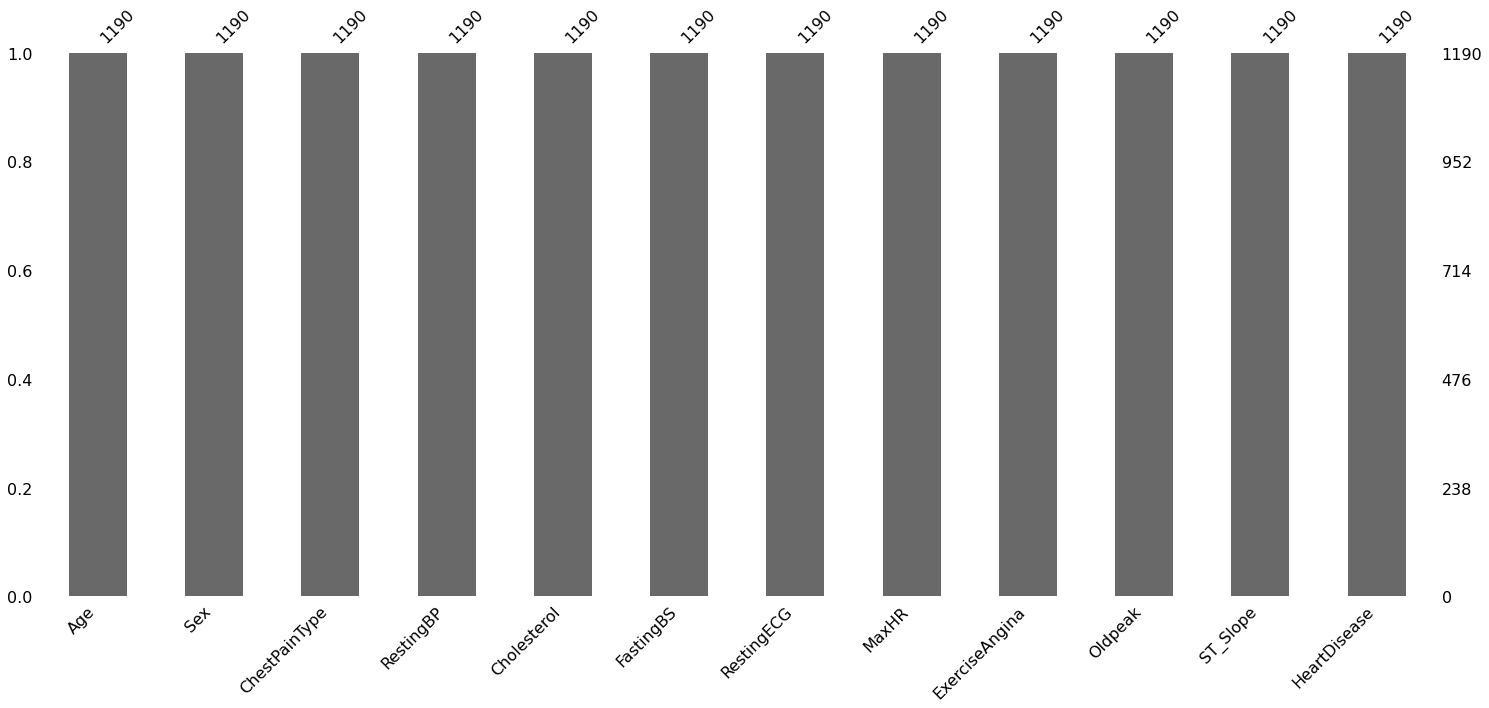

In [19]:
import missingno as msno
msno.bar(heart_df)

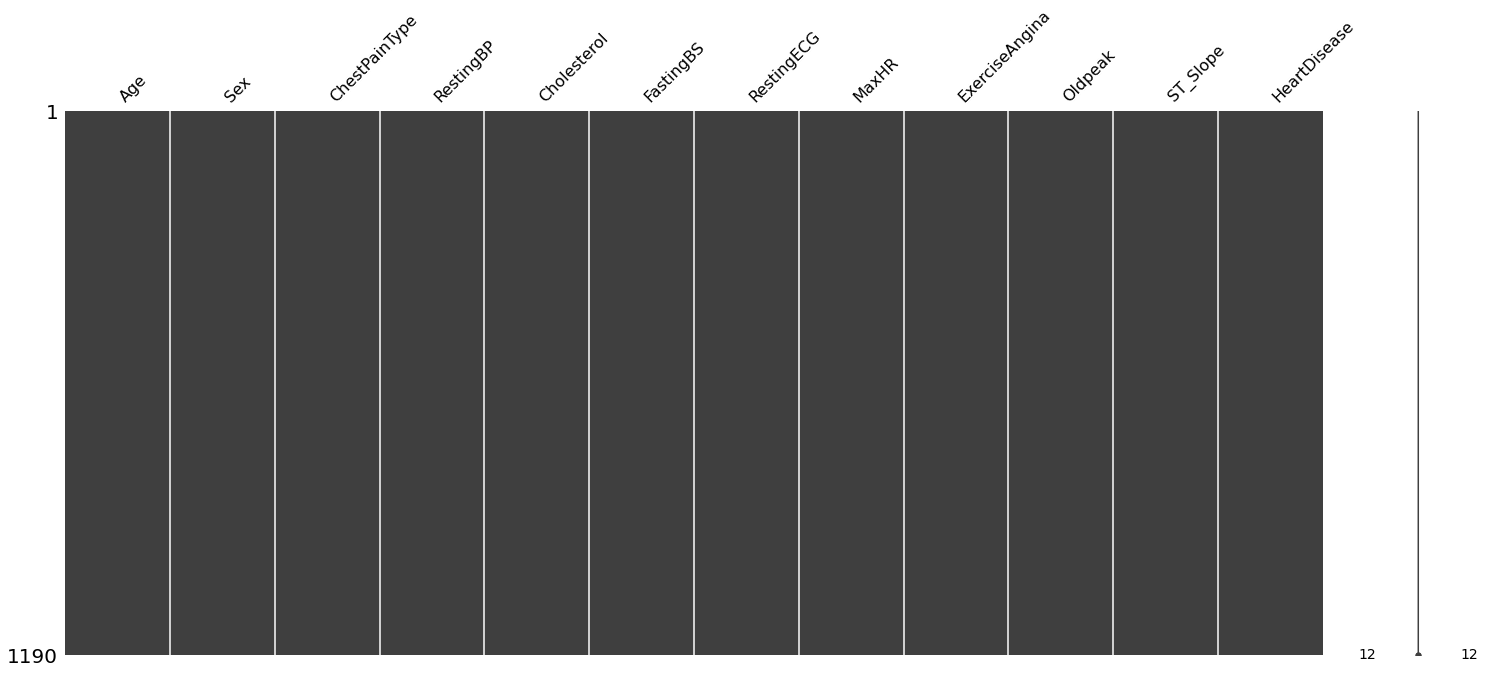

In [20]:
msno.matrix(heart_df)

**Obeservation: There is no missing values**:

---




### Export the pre-processed dataframe to the new csv file.

In [21]:
#heart_df.to_csv('/content/drive/MyDrive/0_data_science/heart_disease/renamed.csv')

## Exploratory Data Analysis

### Checking Target Imbalance

In [22]:
colors = ['Green', 'Red']
labels = ['Normal','Heart Disease']
values = heart_df['HeartDisease'].value_counts()/heart_df['HeartDisease'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent + label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Normal Patient vs Patient with Heart Disease",
    title_font_color="black",
    legend_title_font_color="yellow",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black"
)
fig.show()

**Observation: The data is well balanced**

---



### Checking data type for each columns:

In [23]:
heart_df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

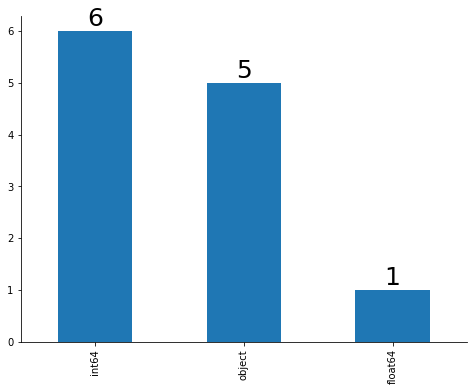

In [24]:
plt.figure(figsize = (8,6))
ax = heart_df.dtypes.value_counts().plot(kind='bar',grid = False)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 25)
sns.despine()

### Categorical features:

In [25]:
cat_cols = [cname for cname in heart_df.loc[:,:'ST_Slope'].columns if
                    heart_df[cname].dtype == "object"]


In [26]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#### Sex


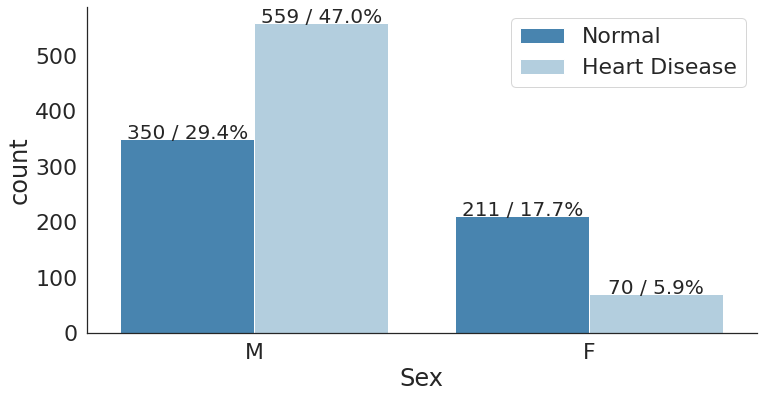

In [27]:
total_cnt = heart_df['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='Sex',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

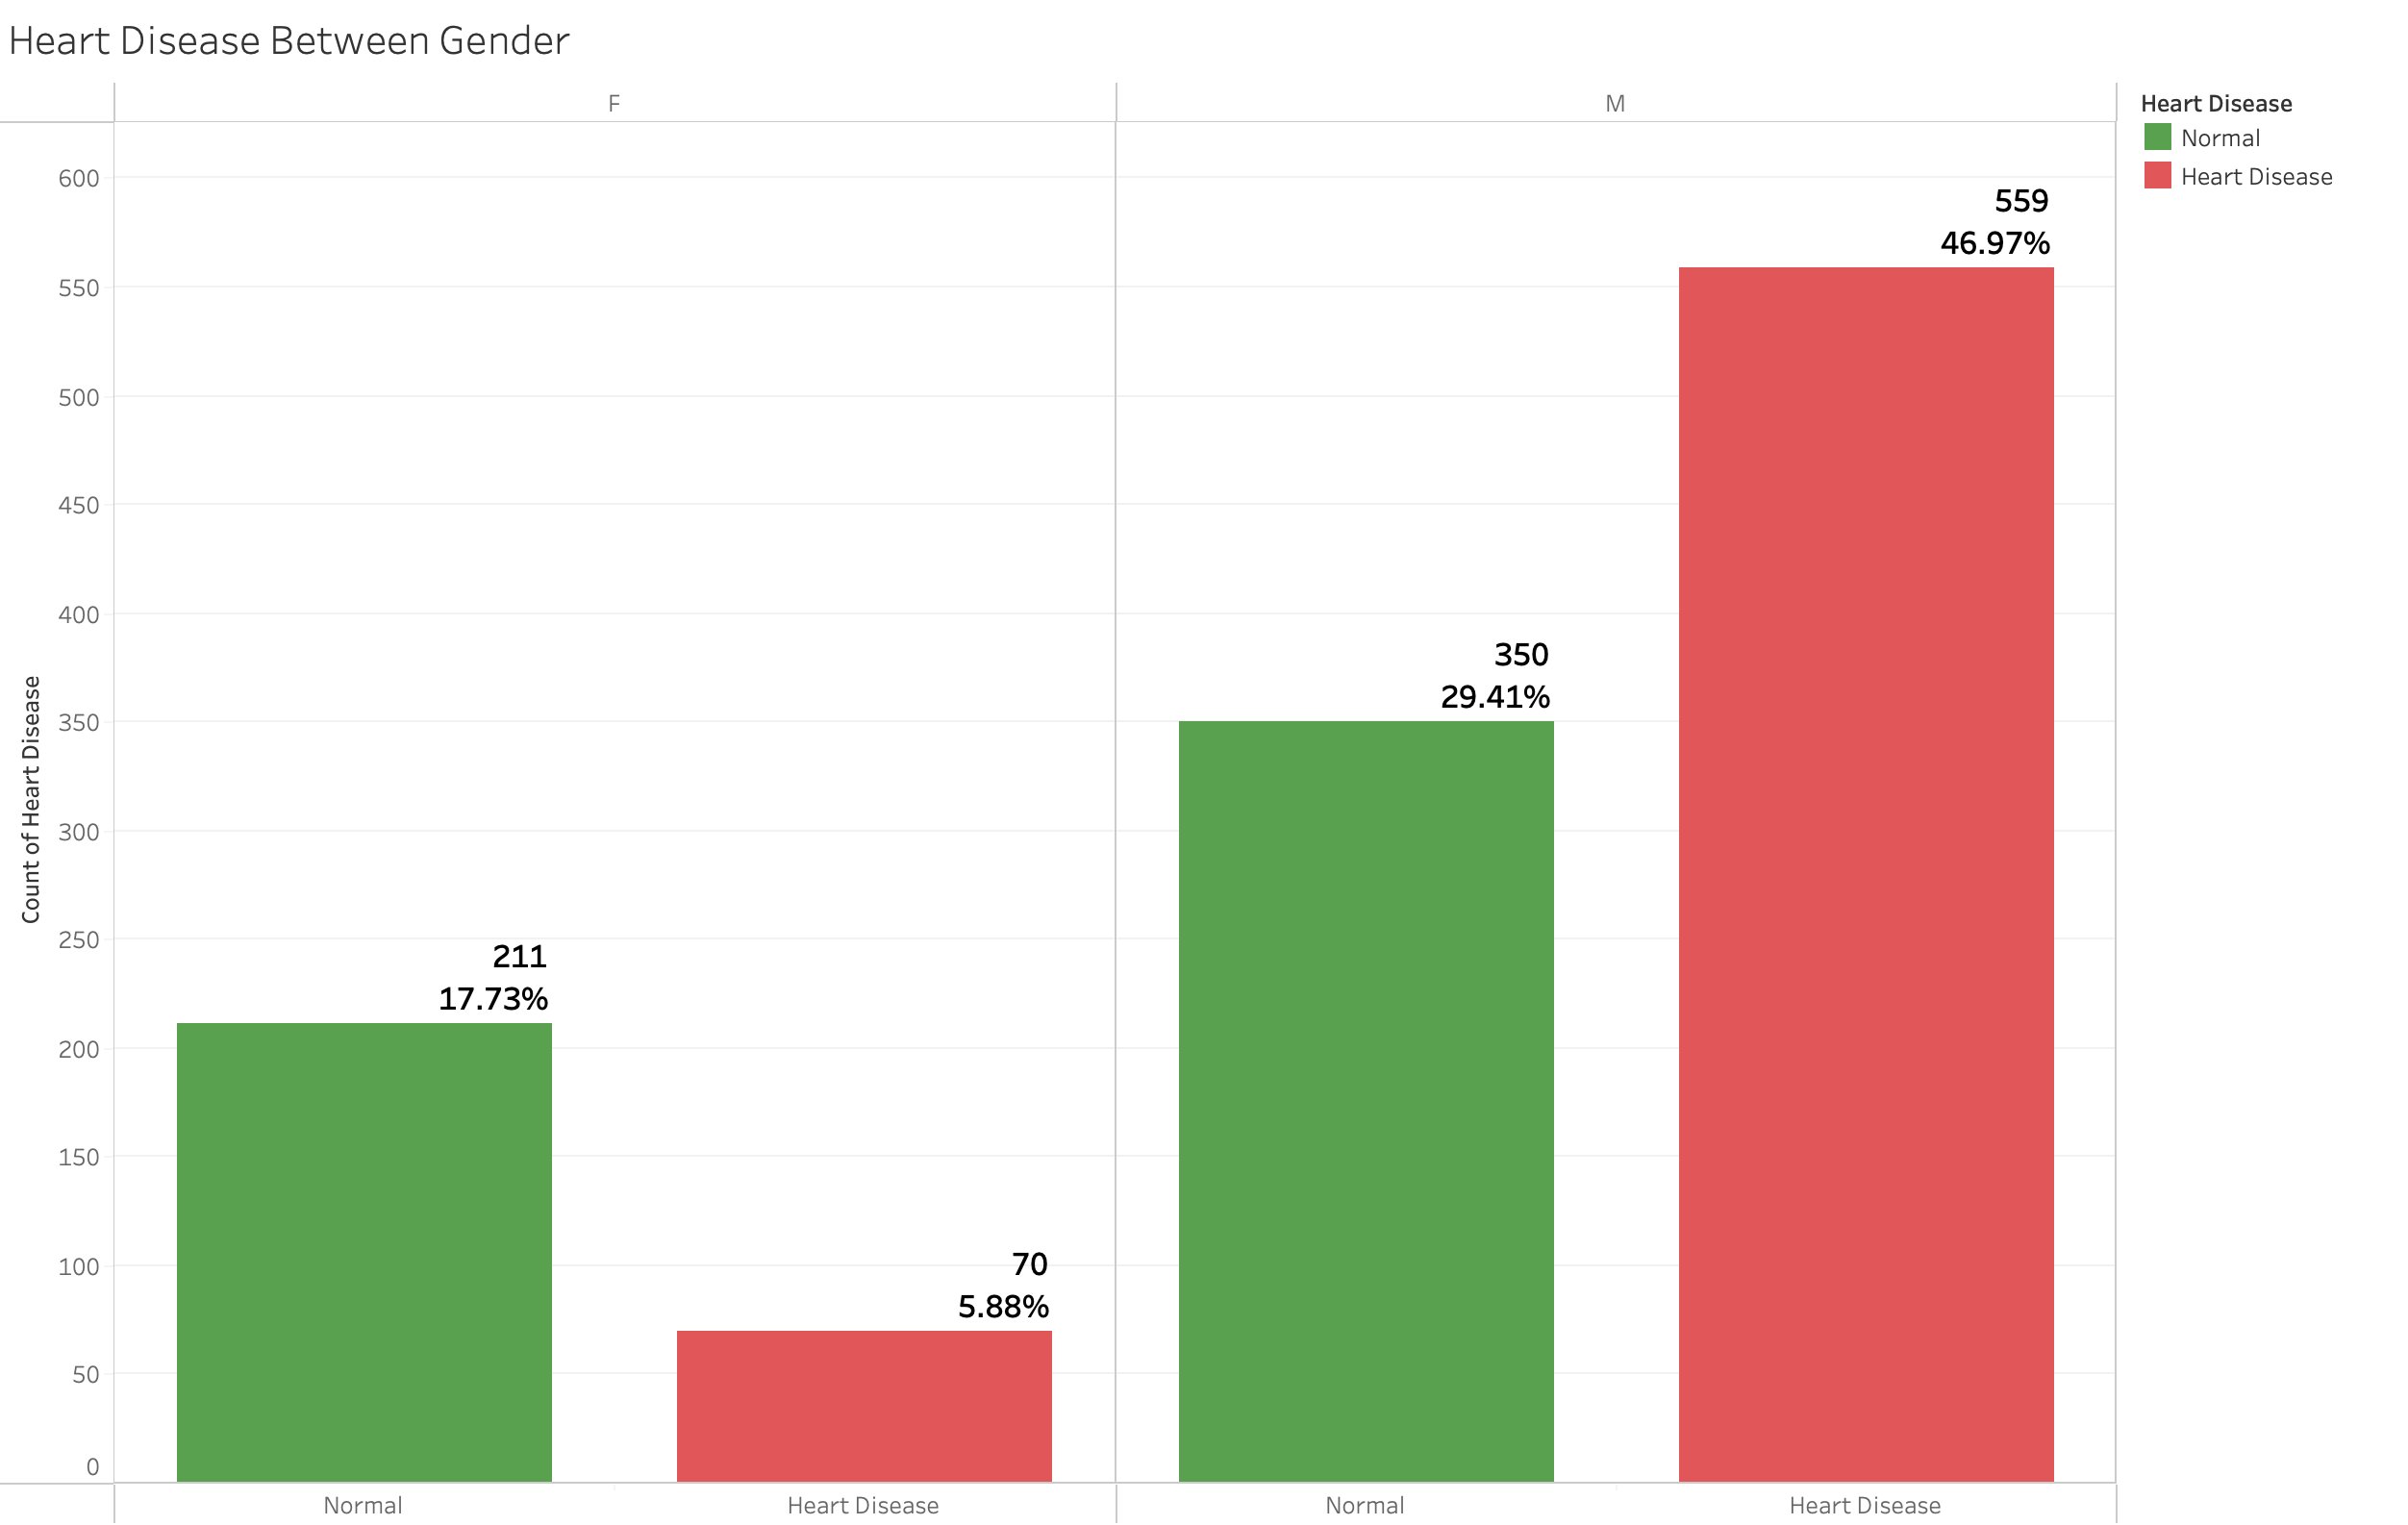

**Observation: Male patients are more likely to suffer from heart disease than female patients**

---



#### Chest Paint Types
  * TA: typical angina
  * ATA: atypical angina
  * NAP: non-anginal pain
  * ASY: asymptomatic

# 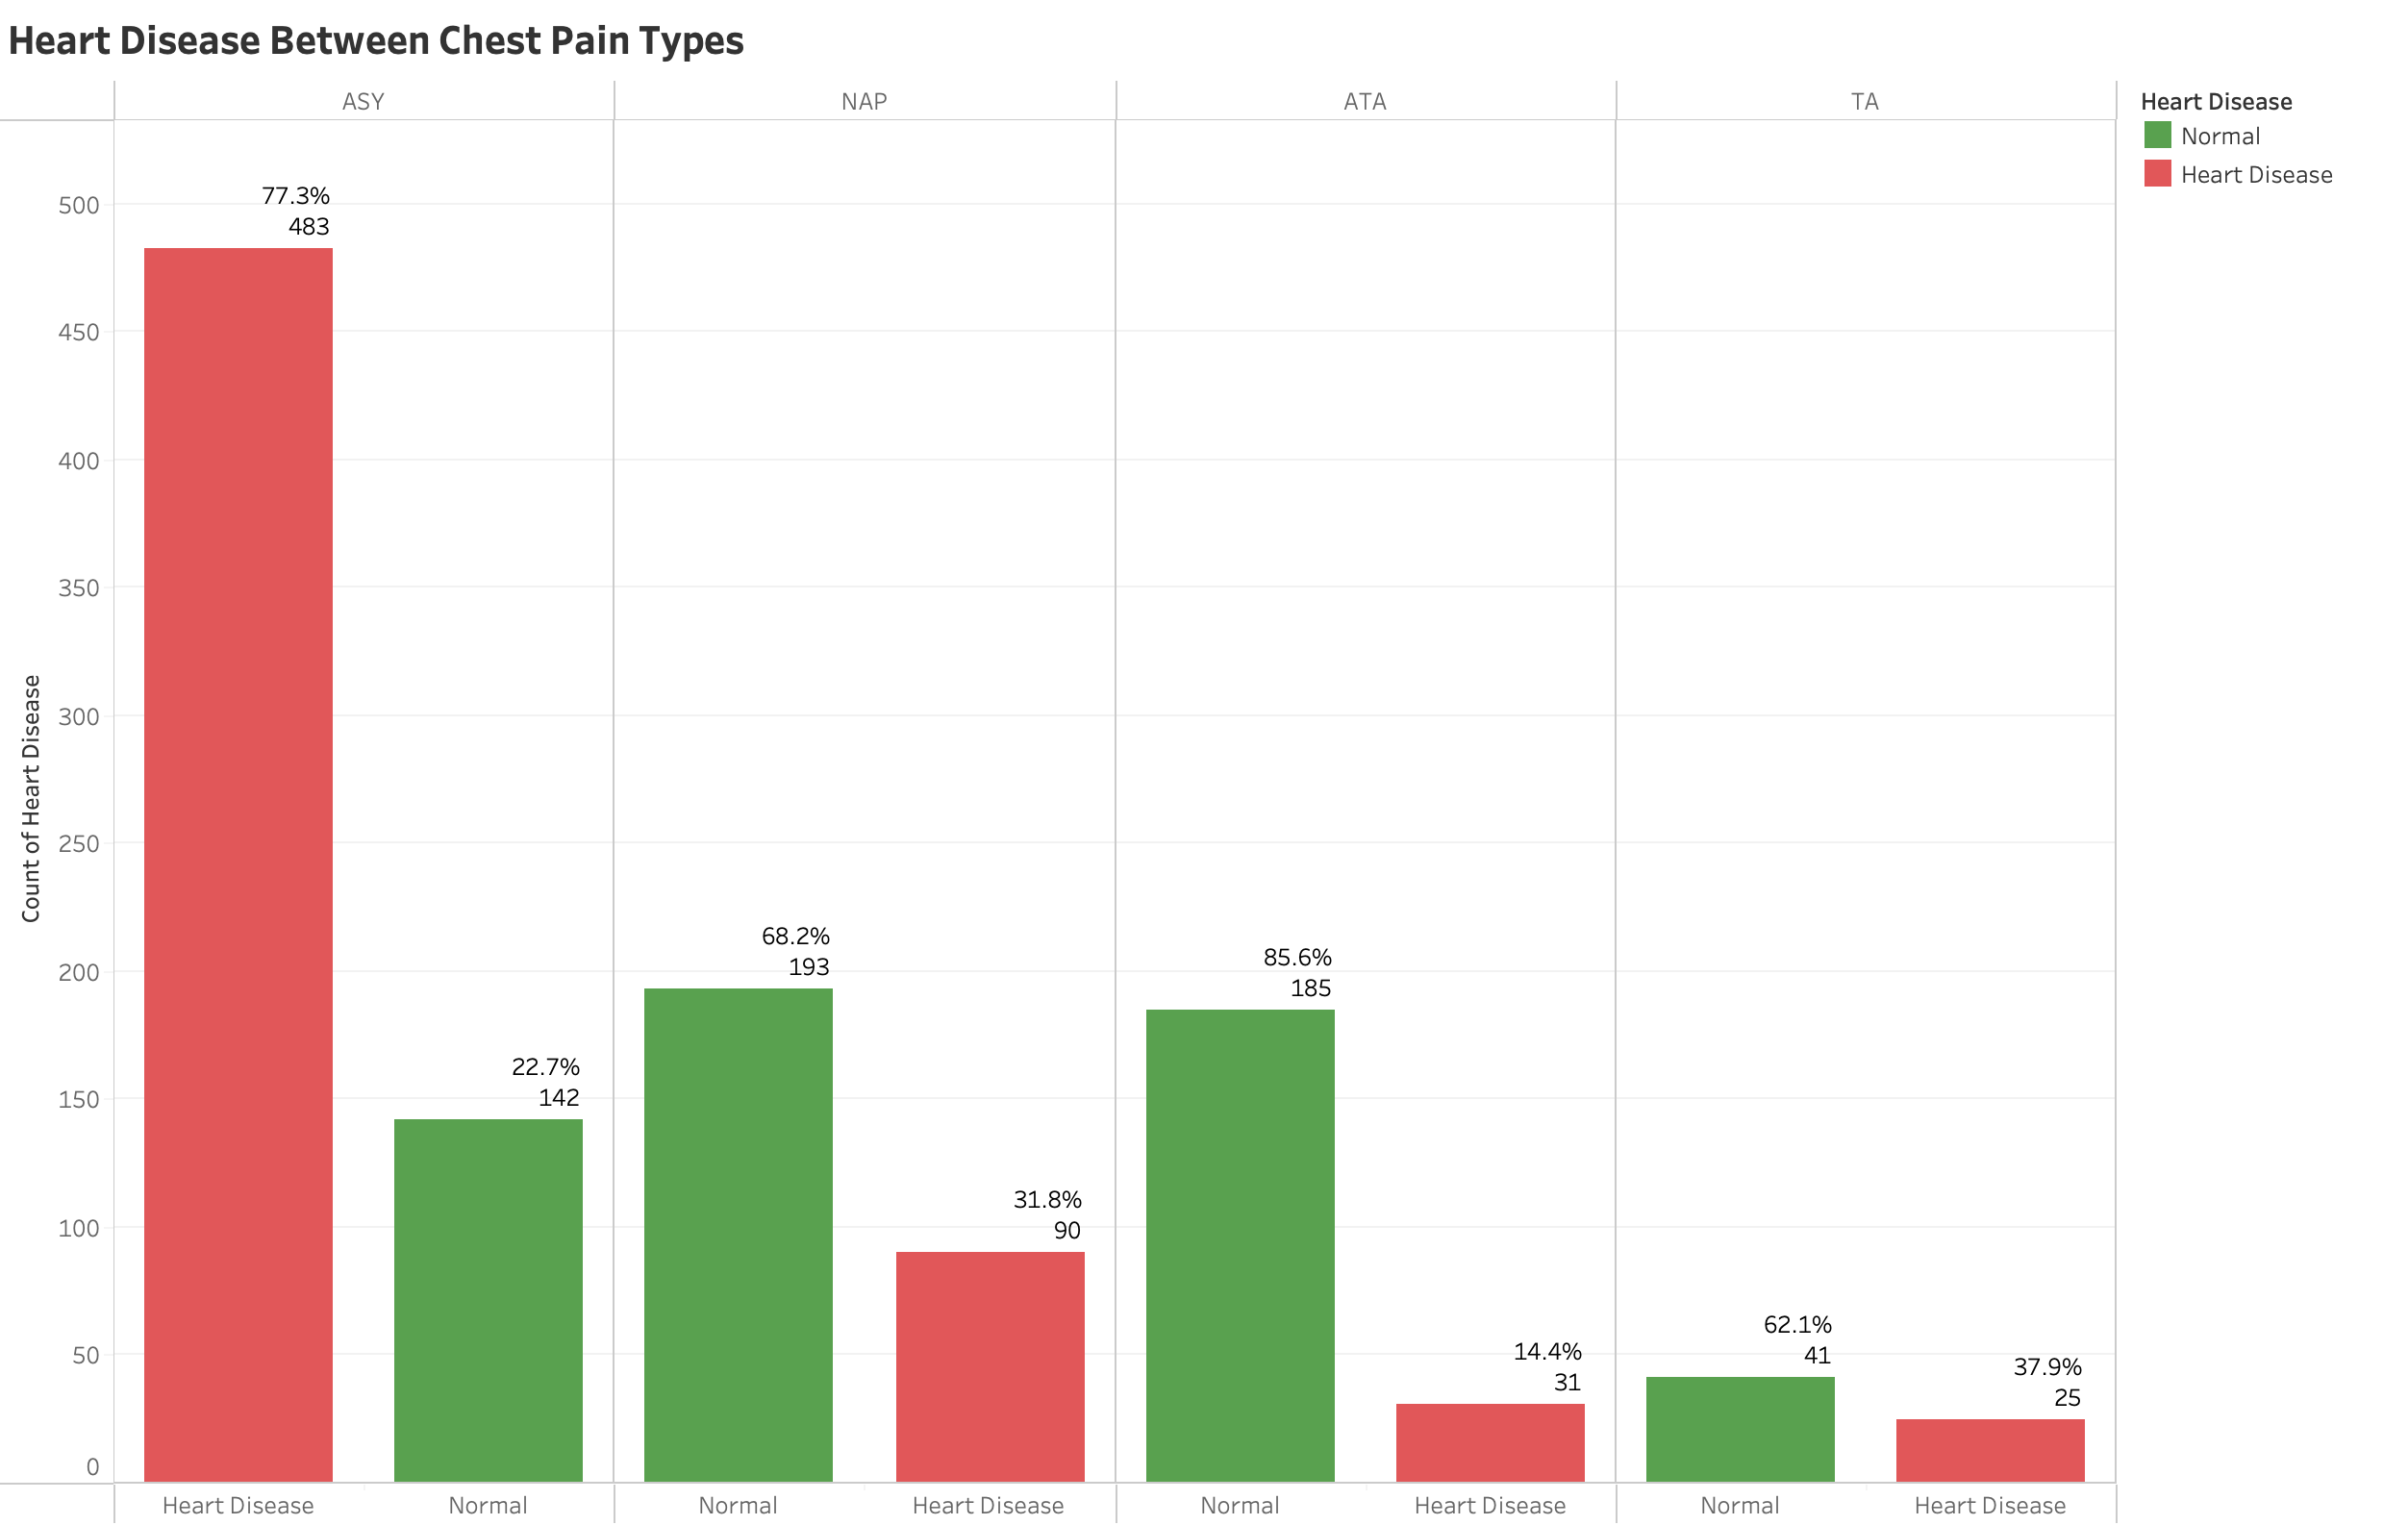

**Observation: Heart disease is more likely to be found in patients with asymptomatic chest pain**

---



#### Resting electrocardiographic measurement
* Normal: Normal,
* ST: having ST-T wave abnormality (T wave inversions and/or ST elevation   or depression of > 0.05 mV),
* LVH: showing probable or definite left ventricular hypertrophy by Estes'  criteria

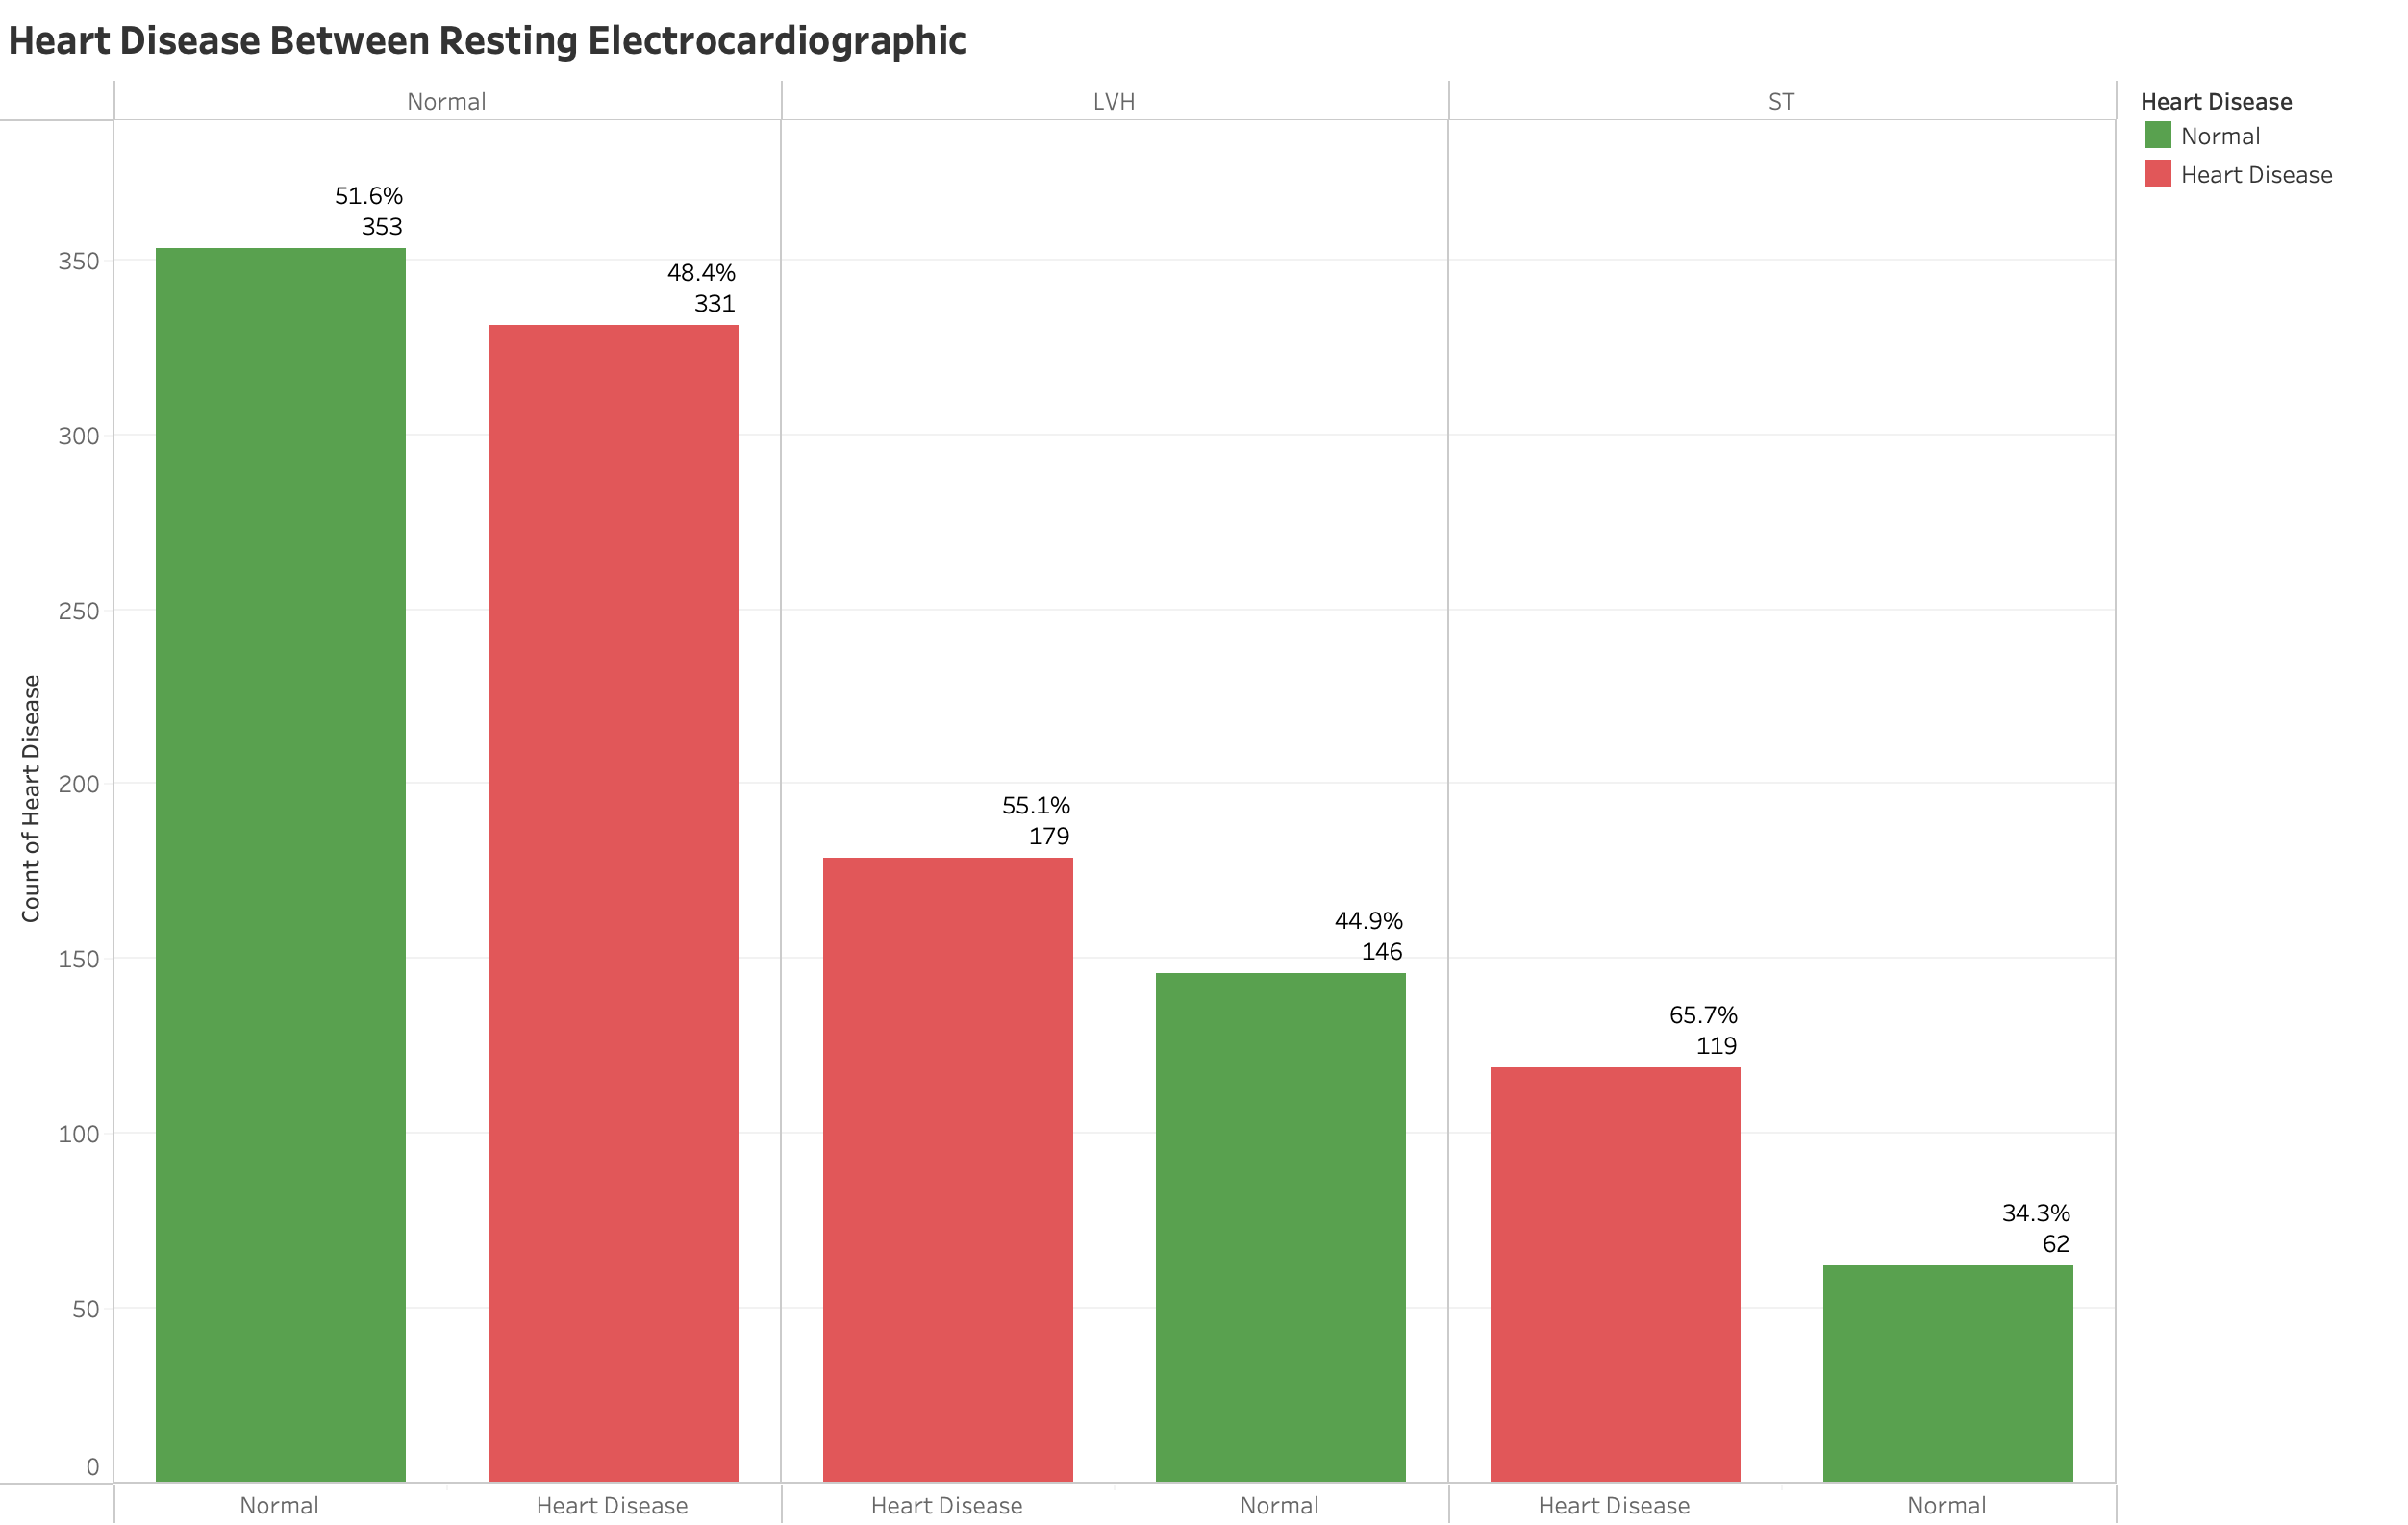

#### 4 - The slope of the peak exercise ST segment
  * Up: upsloping
  * Flat: flat
  * Down: downsloping


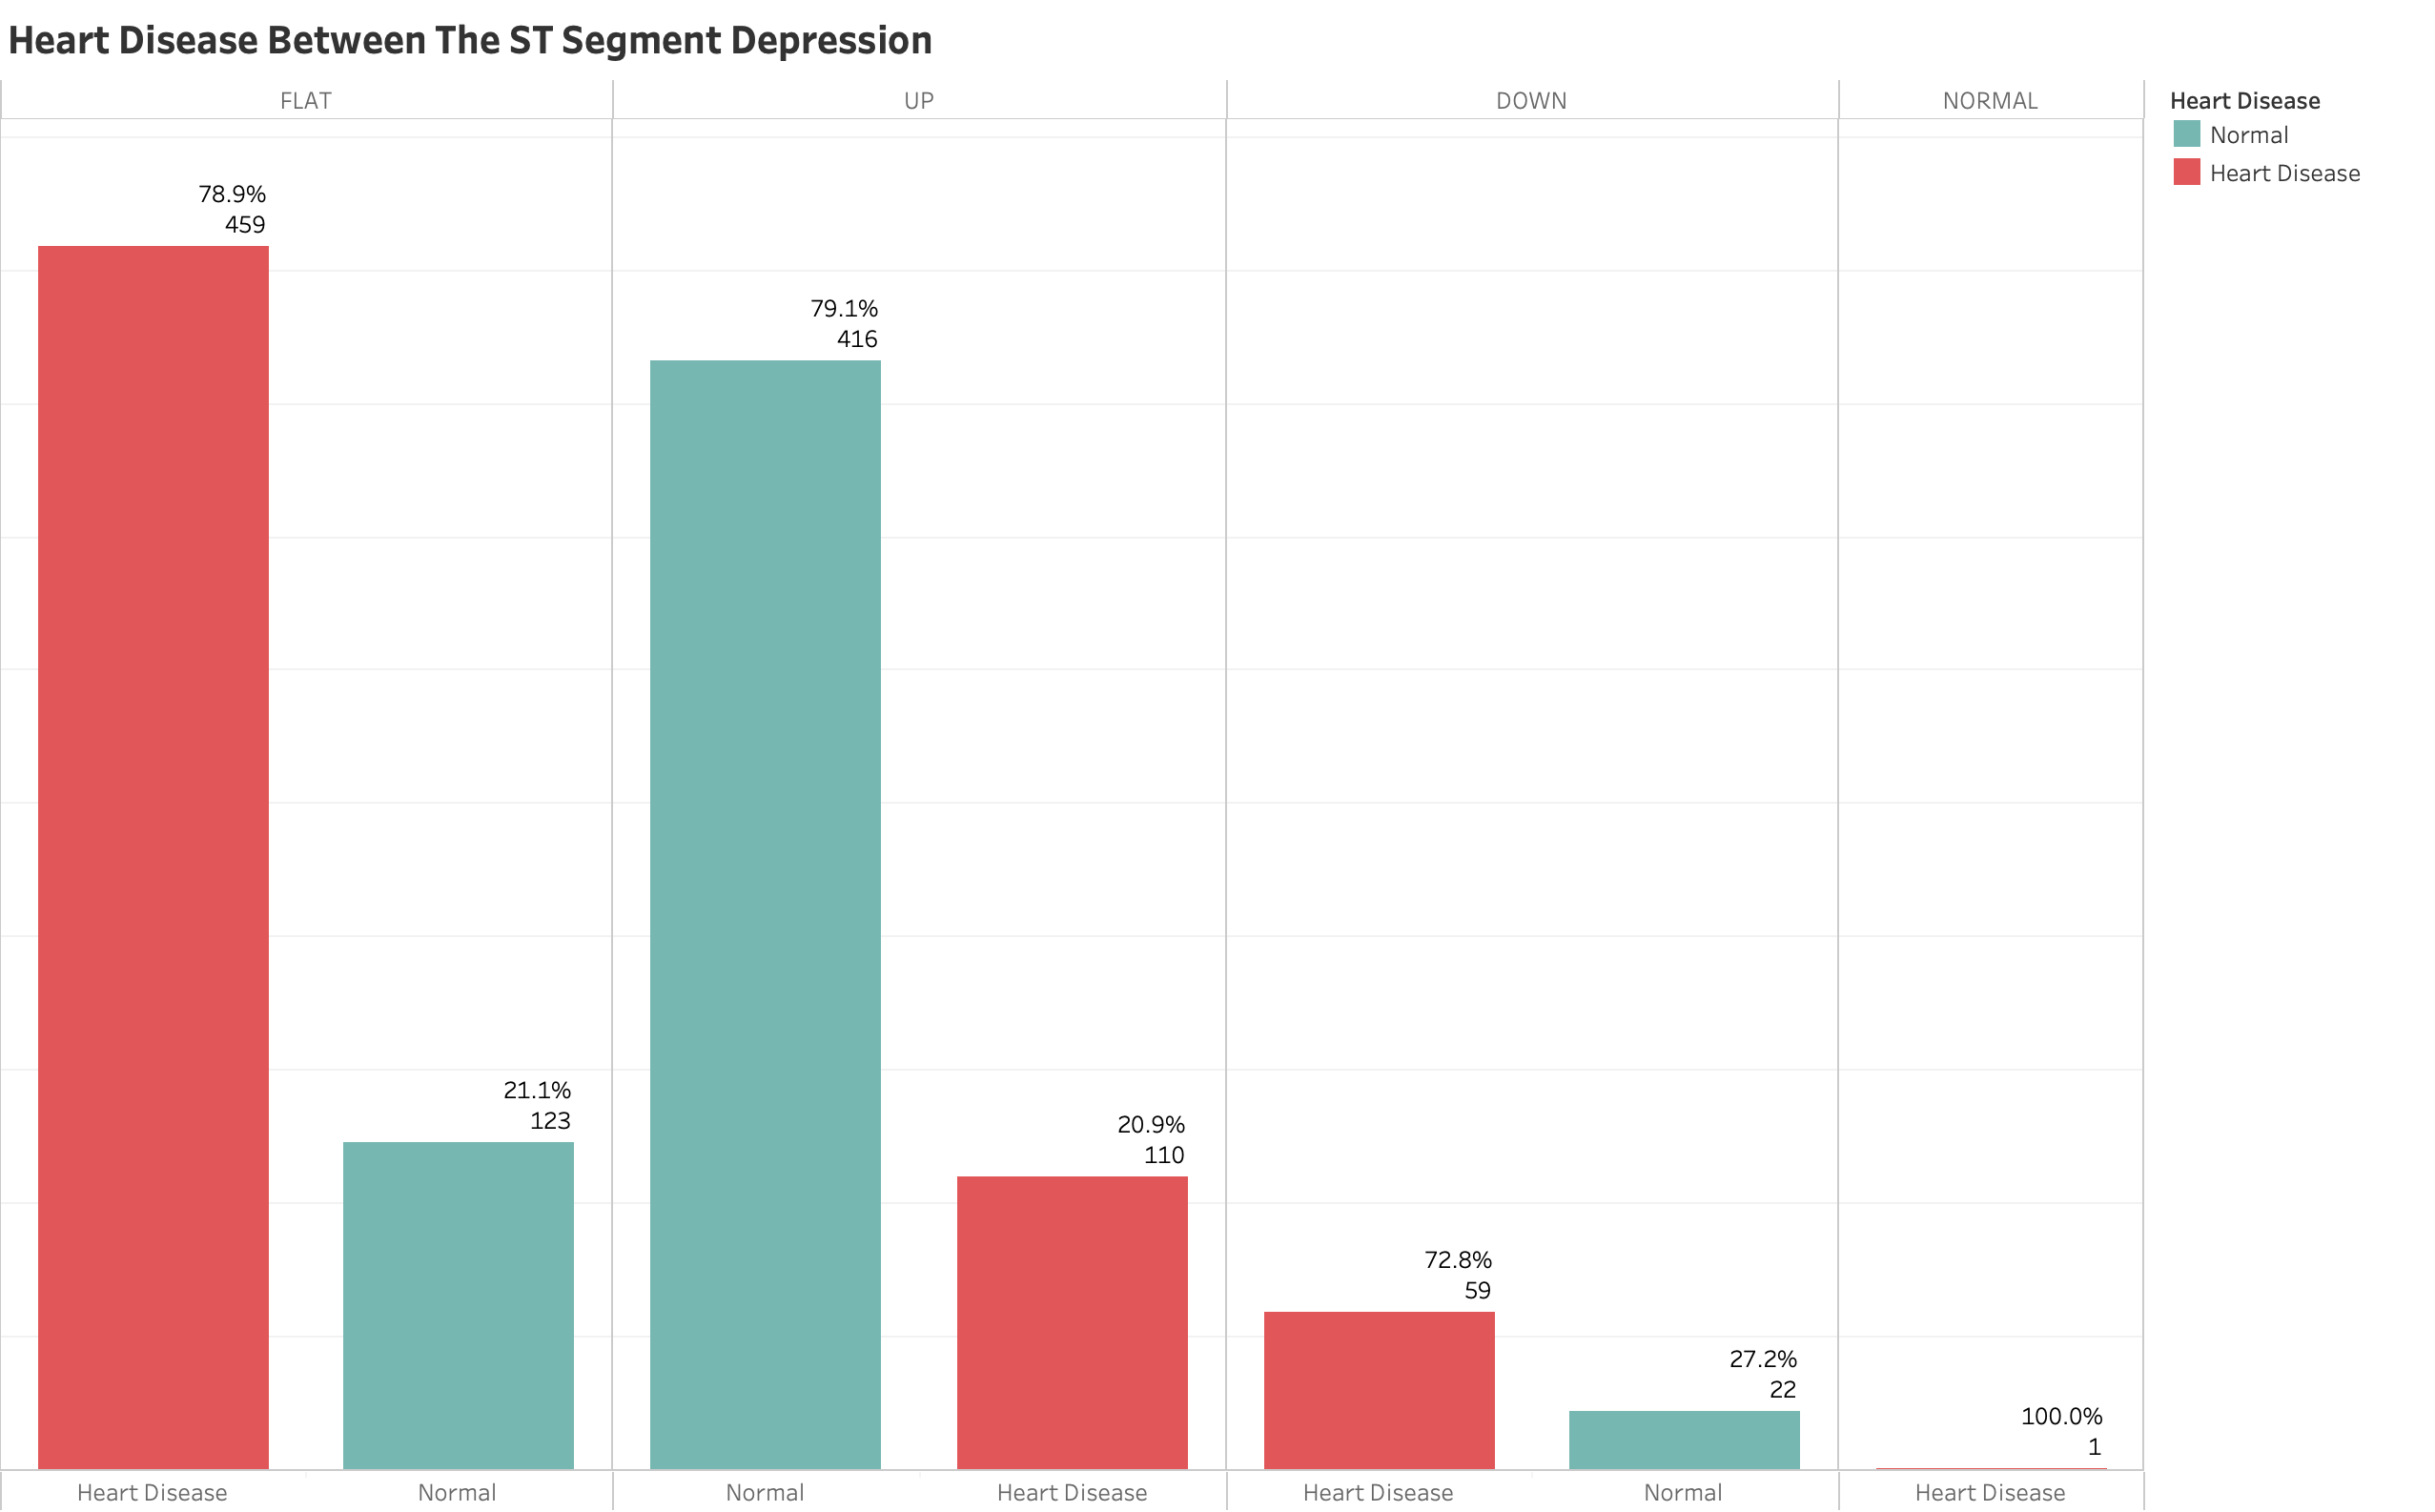

**Observation: Heart disease is more likely to be found in patients with FLAT & DOWN ST Segment Depression Slope**

---



In [28]:
#total_cnt = heart_df['HeartDisease'].count()
#plt.figure(figsize=(15,6))
#sns.set(font_scale = 2)
#plt.subplots_adjust(wspace=0.3)
#sns.set_style("white")
#ax = sns.countplot(data=heart_df, x='ST_Slope',hue='HeartDisease',palette='Blues_r')
#for p in ax.patches:
#    x, height, width = p.get_x(), p.get_height(), p.get_width()
#    ax.text(x + width / 2, height + 7, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
#plt.legend(labels=labels)
#sns.despine()

In [29]:
#Check number of values in each column
heart_df['ST_Slope'].value_counts()

FLAT      582
UP        526
DOWN       81
NORMAL      1
Name: ST_Slope, dtype: int64

In [30]:
#dropping row with st_slope =normal
heart_df.drop(heart_df[heart_df.ST_Slope =='NORMAL'].index, inplace=True)
#checking distribution
heart_df['ST_Slope'].value_counts()

FLAT    582
UP      526
DOWN     81
Name: ST_Slope, dtype: int64

In [31]:
#total_cnt = heart_df['HeartDisease'].count()
#plt.figure(figsize=(15,6))
#sns.set(font_scale = 2)
#plt.subplots_adjust(wspace=0.3)
#sns.set_style("white")
#ax = sns.countplot(data=heart_df, x='ST_Slope',hue='HeartDisease',palette='Blues_r')
#for p in ax.patches:
#    x, height, width = p.get_x(), p.get_height(), p.get_width()
#    ax.text(x + width / 2, height + 7, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
#plt.legend(labels=labels)
#sns.despine()

#### 5 - Exercise-Indulged Angina
 Exercise-induced angina
  * Y: Yes
  * N: No

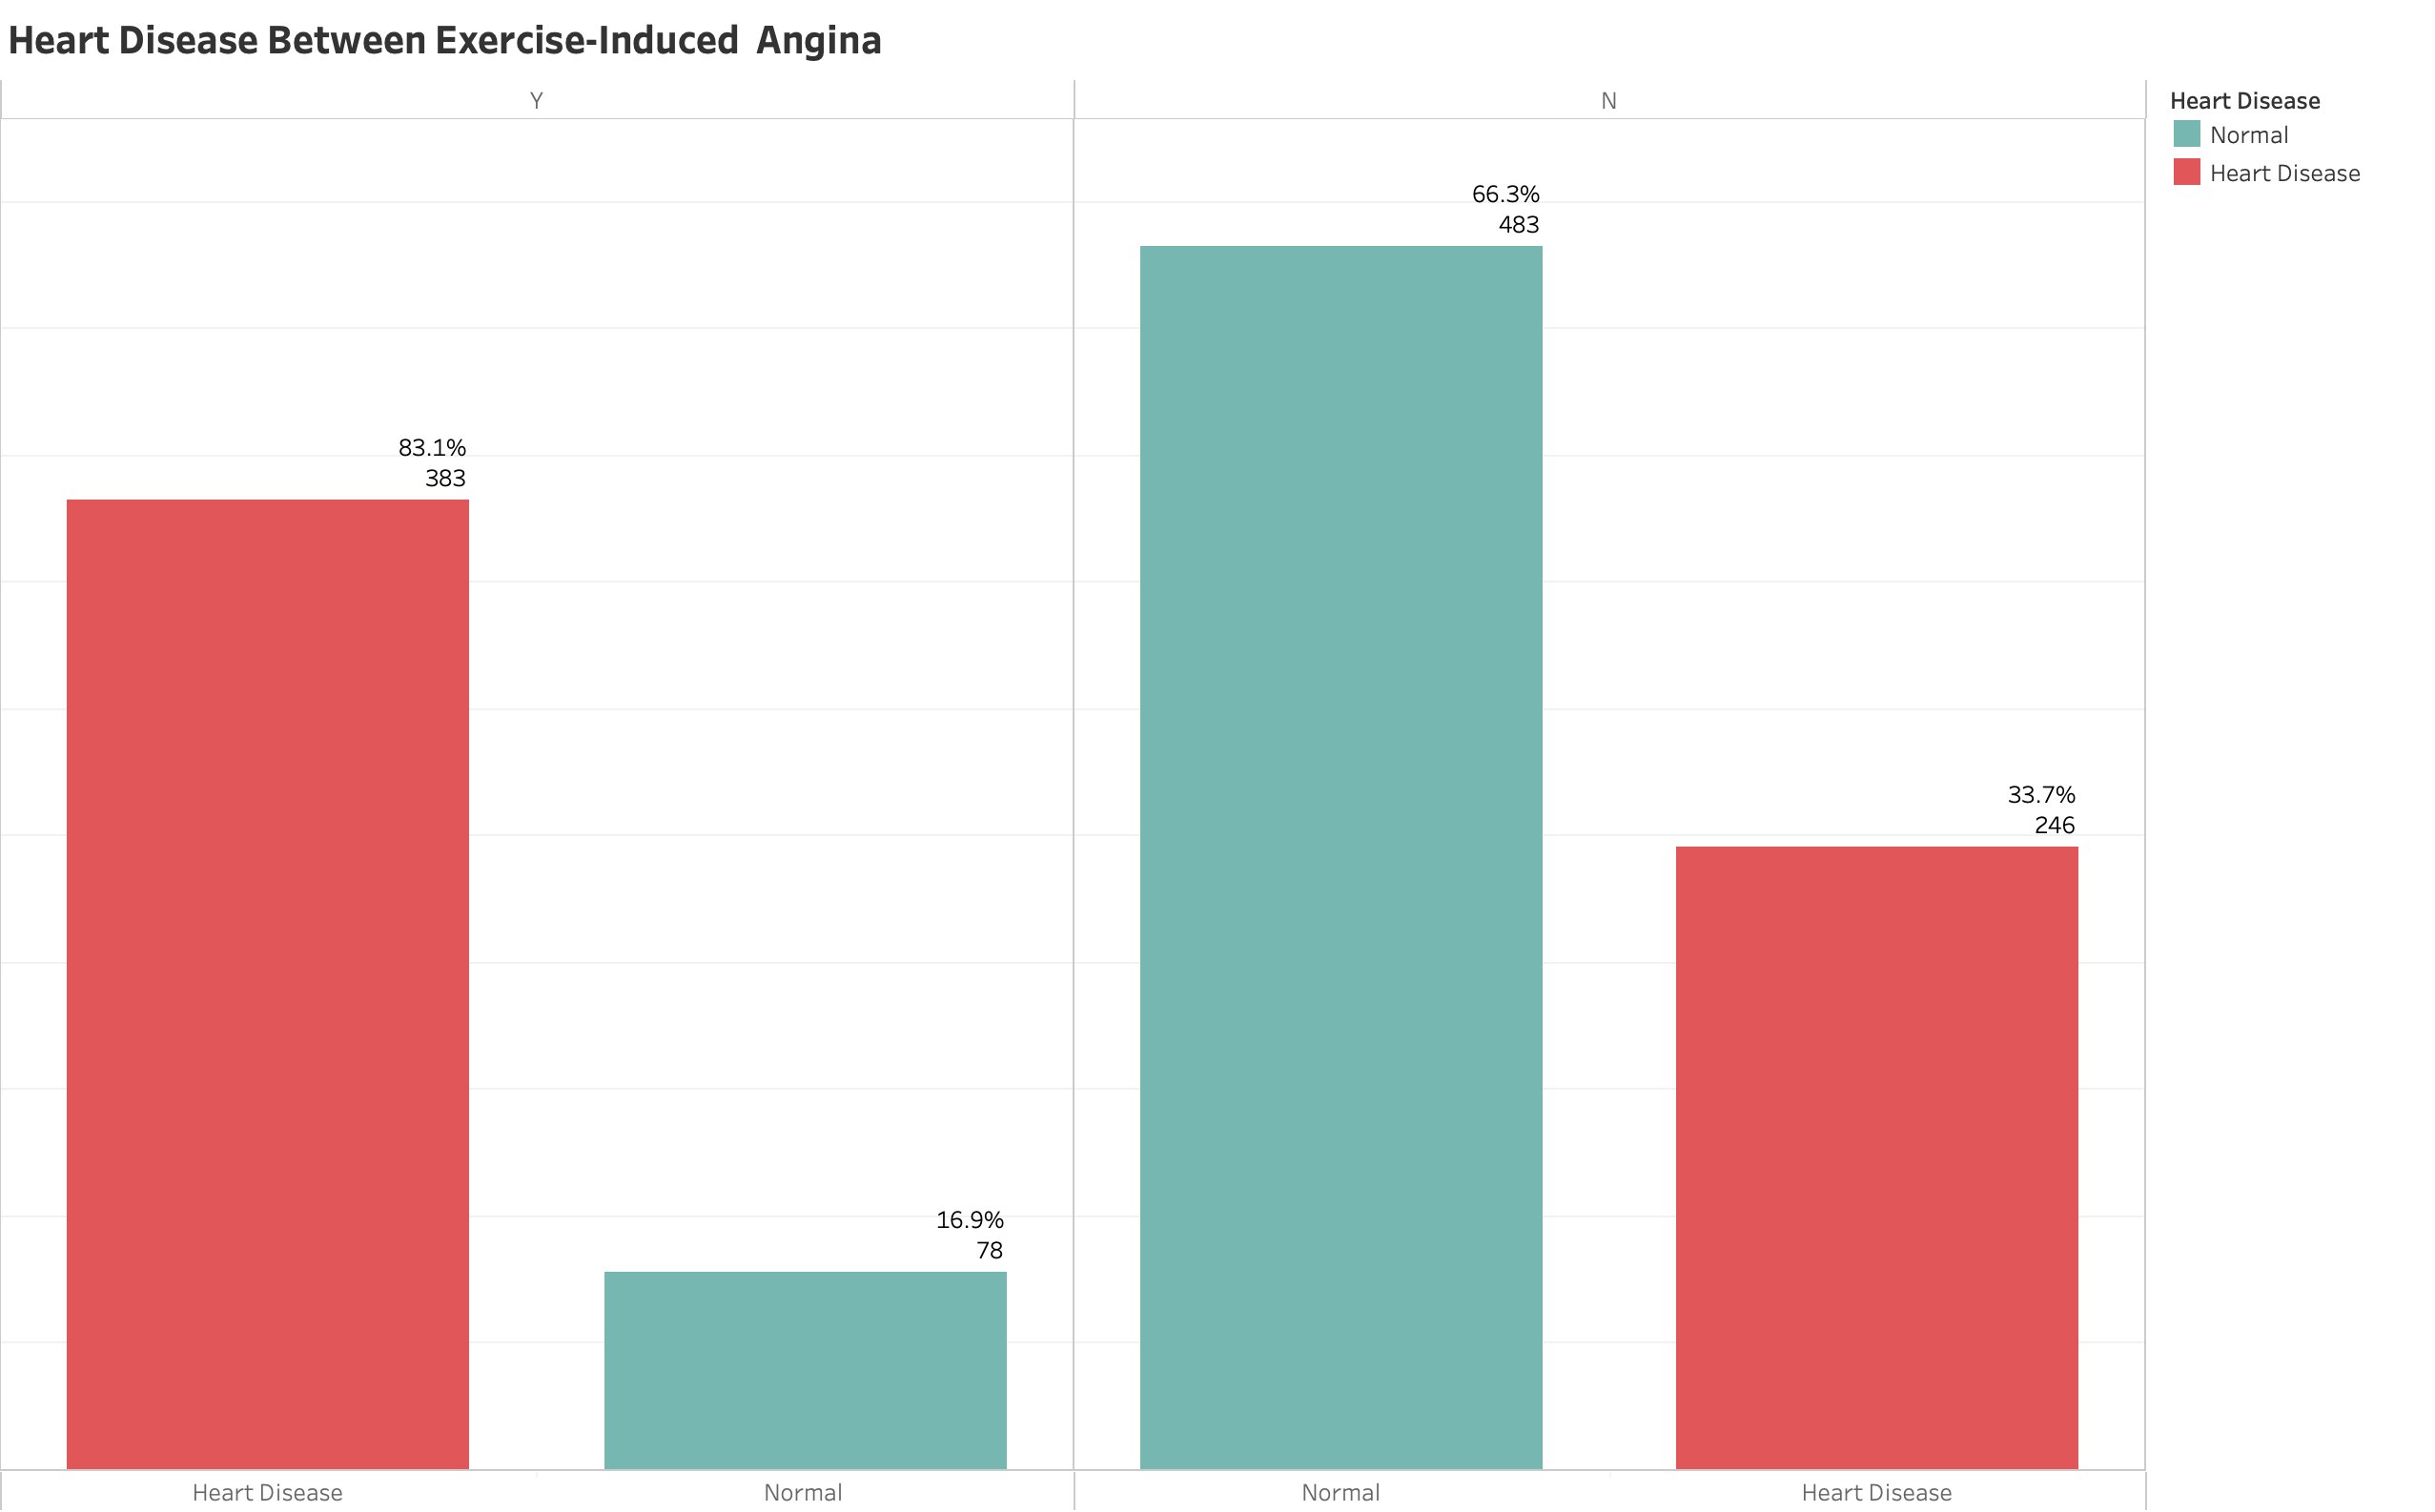

**Observation: Approximately 83% of patients with exercise-induced angina have underlying heart conditions.**

#### 6 - Fasting BS
Fasting blood sugar 
* 1: if FastingBS > 120 mg/dl
* 0: if FastingBS < 120 mg/dl

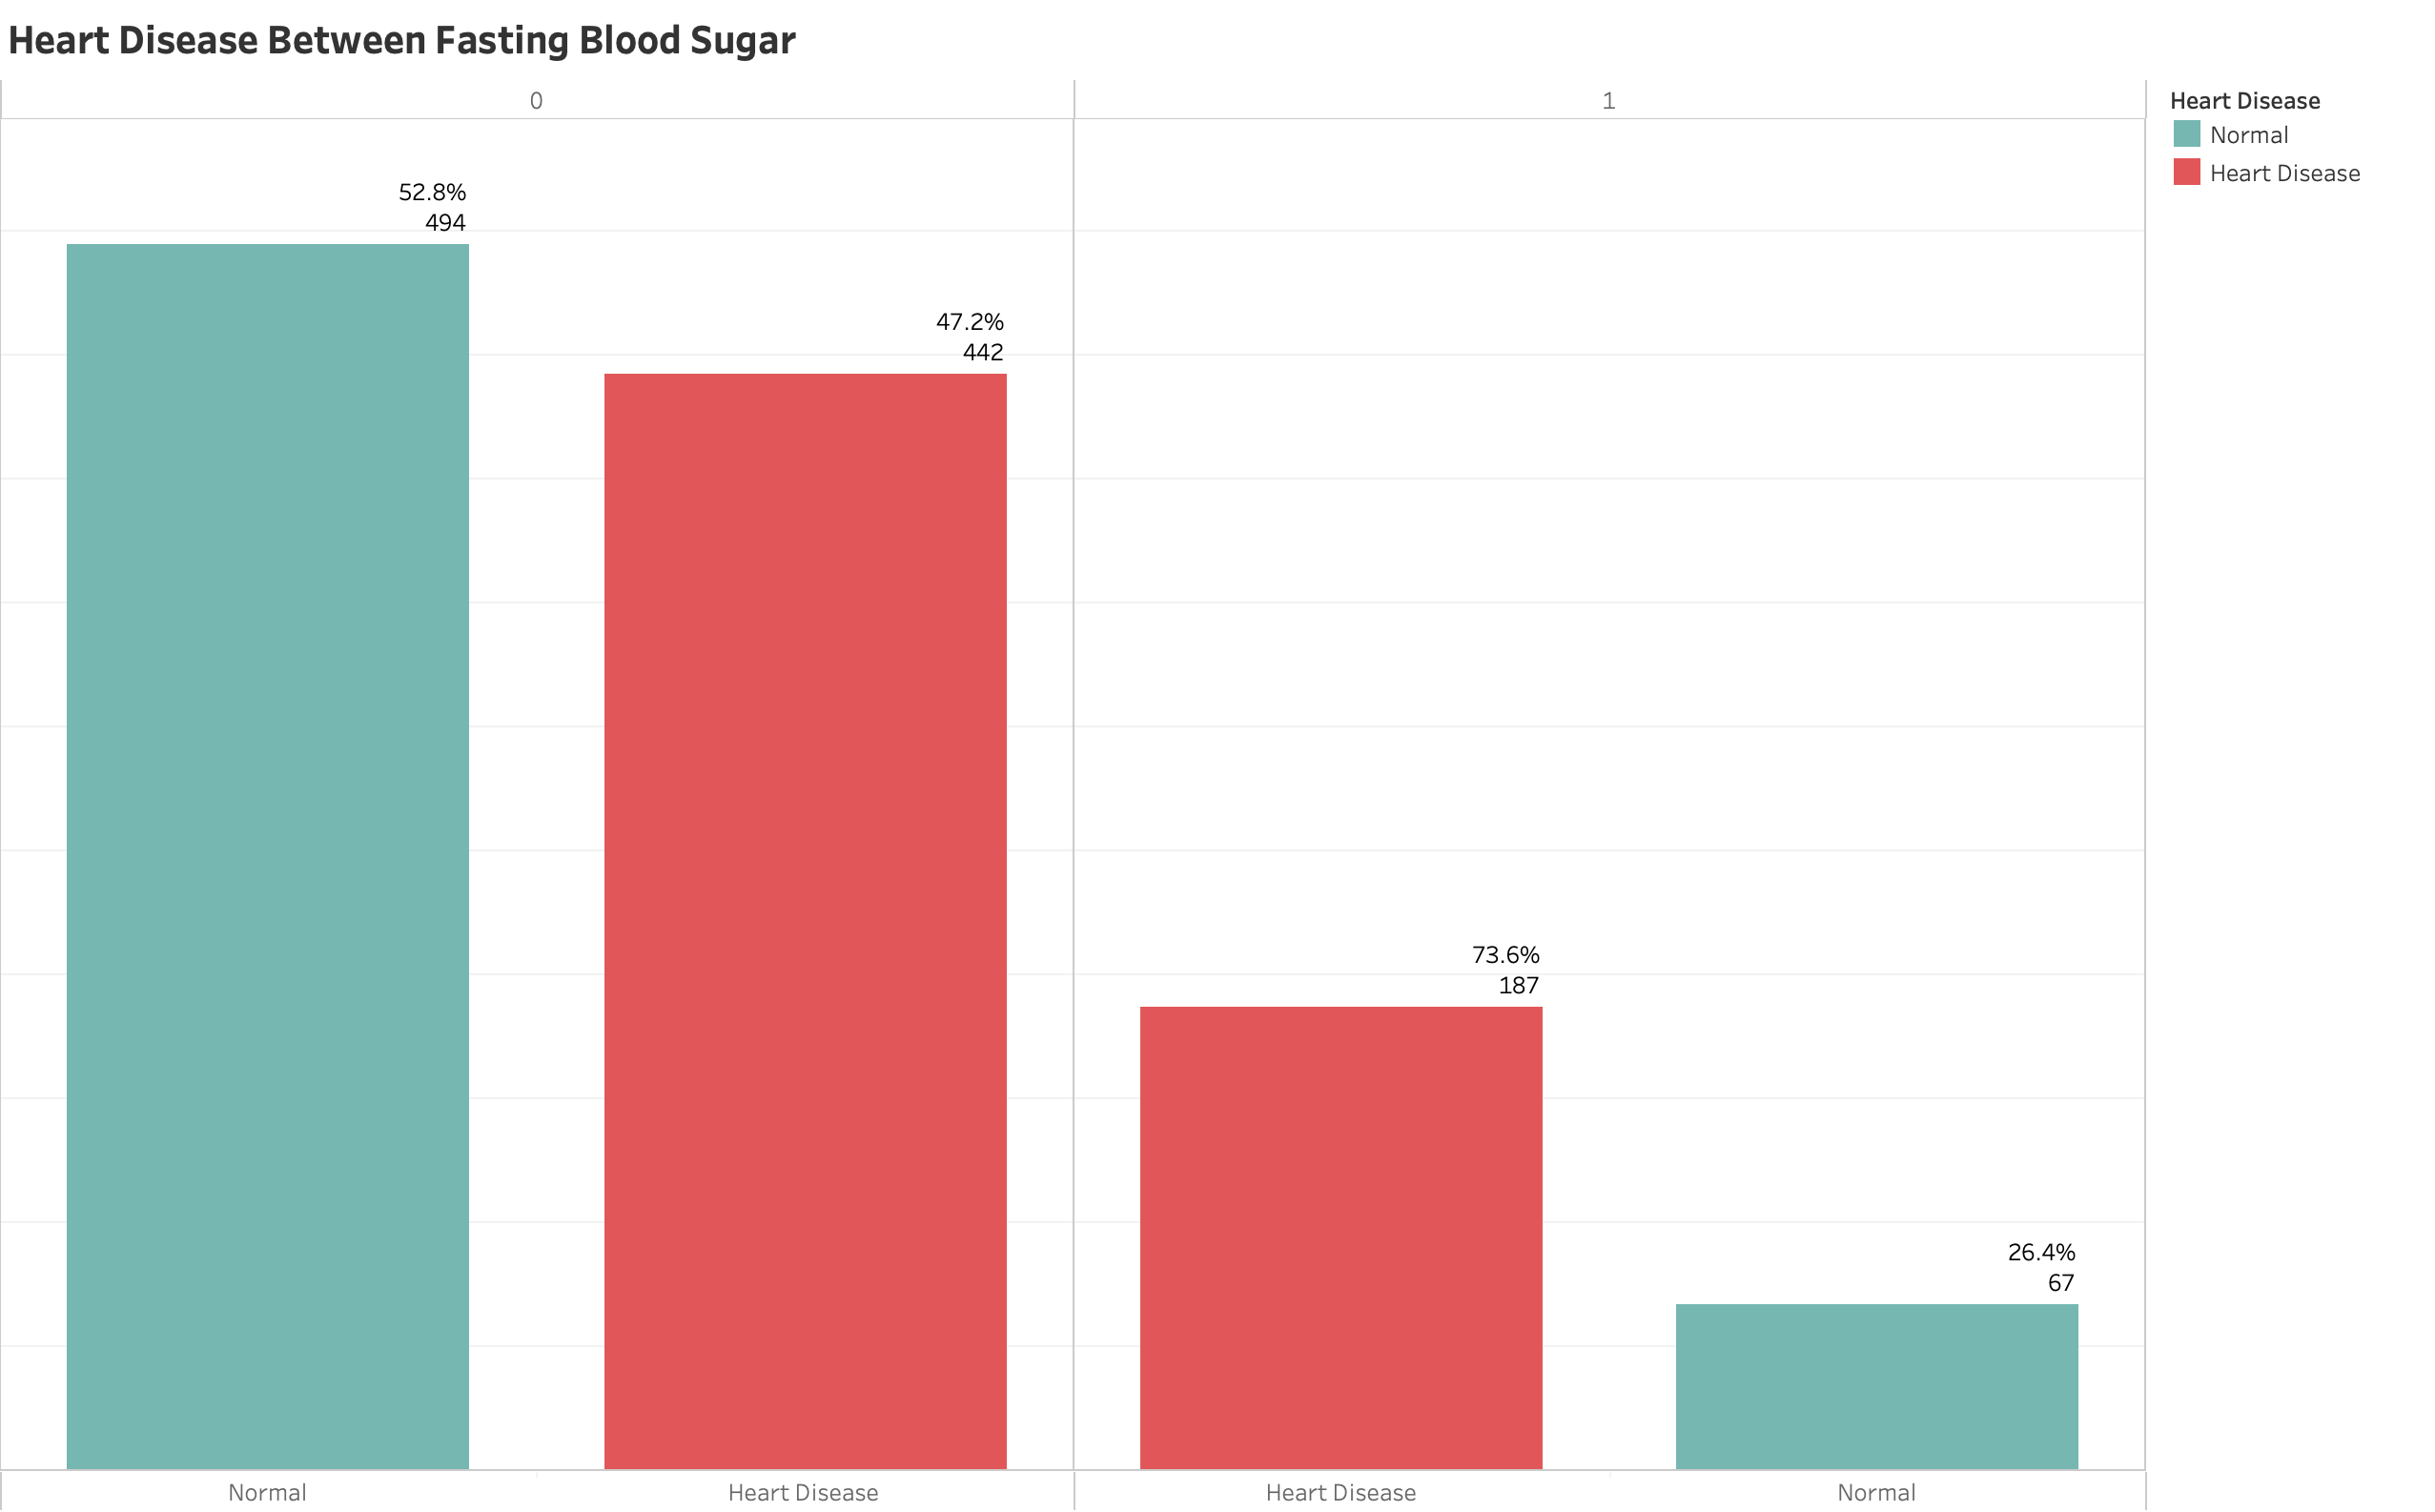

**Observation: Approximately 74% of patients with fasting blood surgar > 120 mg/dl have underlying heart conditions.**

### Numerical Features

Display statistical values

In [32]:
import statistics
def display_stat(feature):
    mean = heart_df[feature].mean()
    median = heart_df[feature].median()
    mode = statistics.mode(heart_df[feature])
    std = heart_df[feature].std()
    skew = heart_df[feature].skew()
    kurtosis = heart_df[feature].kurtosis()
    print_in_color(f'mean: {mean}, median: {median}, mode: {mode} std: {std}, skew: {skew}, kurtosis: {kurtosis}')
   

Display histogram between normal patients and heart disease patients 

In [33]:
def plot_histgram(feature): 
    plt.figure(figsize=(15,8))   
    fig = px.histogram(heart_df, x=feature,
                       color="HeartDisease", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title_font_color="white",
        legend_title_font_color="yellow",
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        paper_bgcolor="black",
        plot_bgcolor='black',
        font_color="white"
    )
    fig.show()

In [34]:
#def plot_histgram(feature):    
#    fig = px.histogram(heart_df, x=feature,
#                       color="HeartDisease", 
#                       marginal="box",
#                       barmode ="overlay",
#                       histnorm ='density'
#                      )  
#    fig.update_layout(
#        title_font_color="black",
#        legend_title_font_color="black",
#        title={
#            'text': feature+" histogram",
#            'x':0.5,
#            'xanchor': 'center',
#            'yanchor': 'top'},
#    )
#    fig.show()

In [35]:
num_cols = [cname for cname in heart_df.loc[:,:'ST_Slope'].columns if
                    heart_df[cname].dtype != "object"]
num_cols

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [36]:
from scipy import stats
import numpy as np

In [37]:
def plot_data_dist(heart_df,col):
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(heart_df[col], label="skew: " + str(np.round(heart_df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(heart_df[col])
    plt.subplot(133)
    stats.probplot(heart_df[col], plot=plt)
    plt.tight_layout()
    plt.show()
    display_stat(col)
    plot_histgram(col)

#### 1 - Age

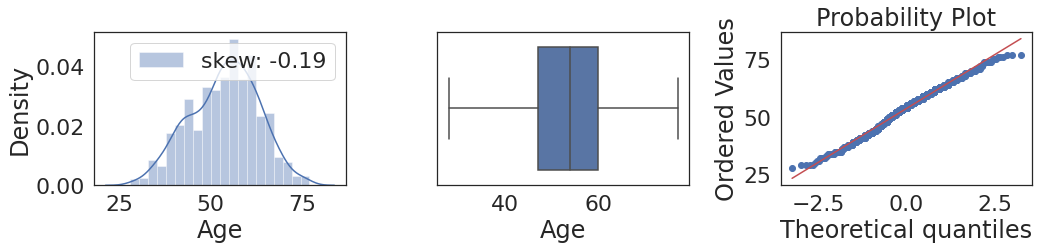

mean: 53.70815811606392, median: 54.0, mode: 54 std: 9.352961452640239, skew: -0.19173875305325064, kurtosis: -0.40935256193011504



<Figure size 1080x576 with 0 Axes>

In [38]:
plot_data_dist(heart_df,'Age')

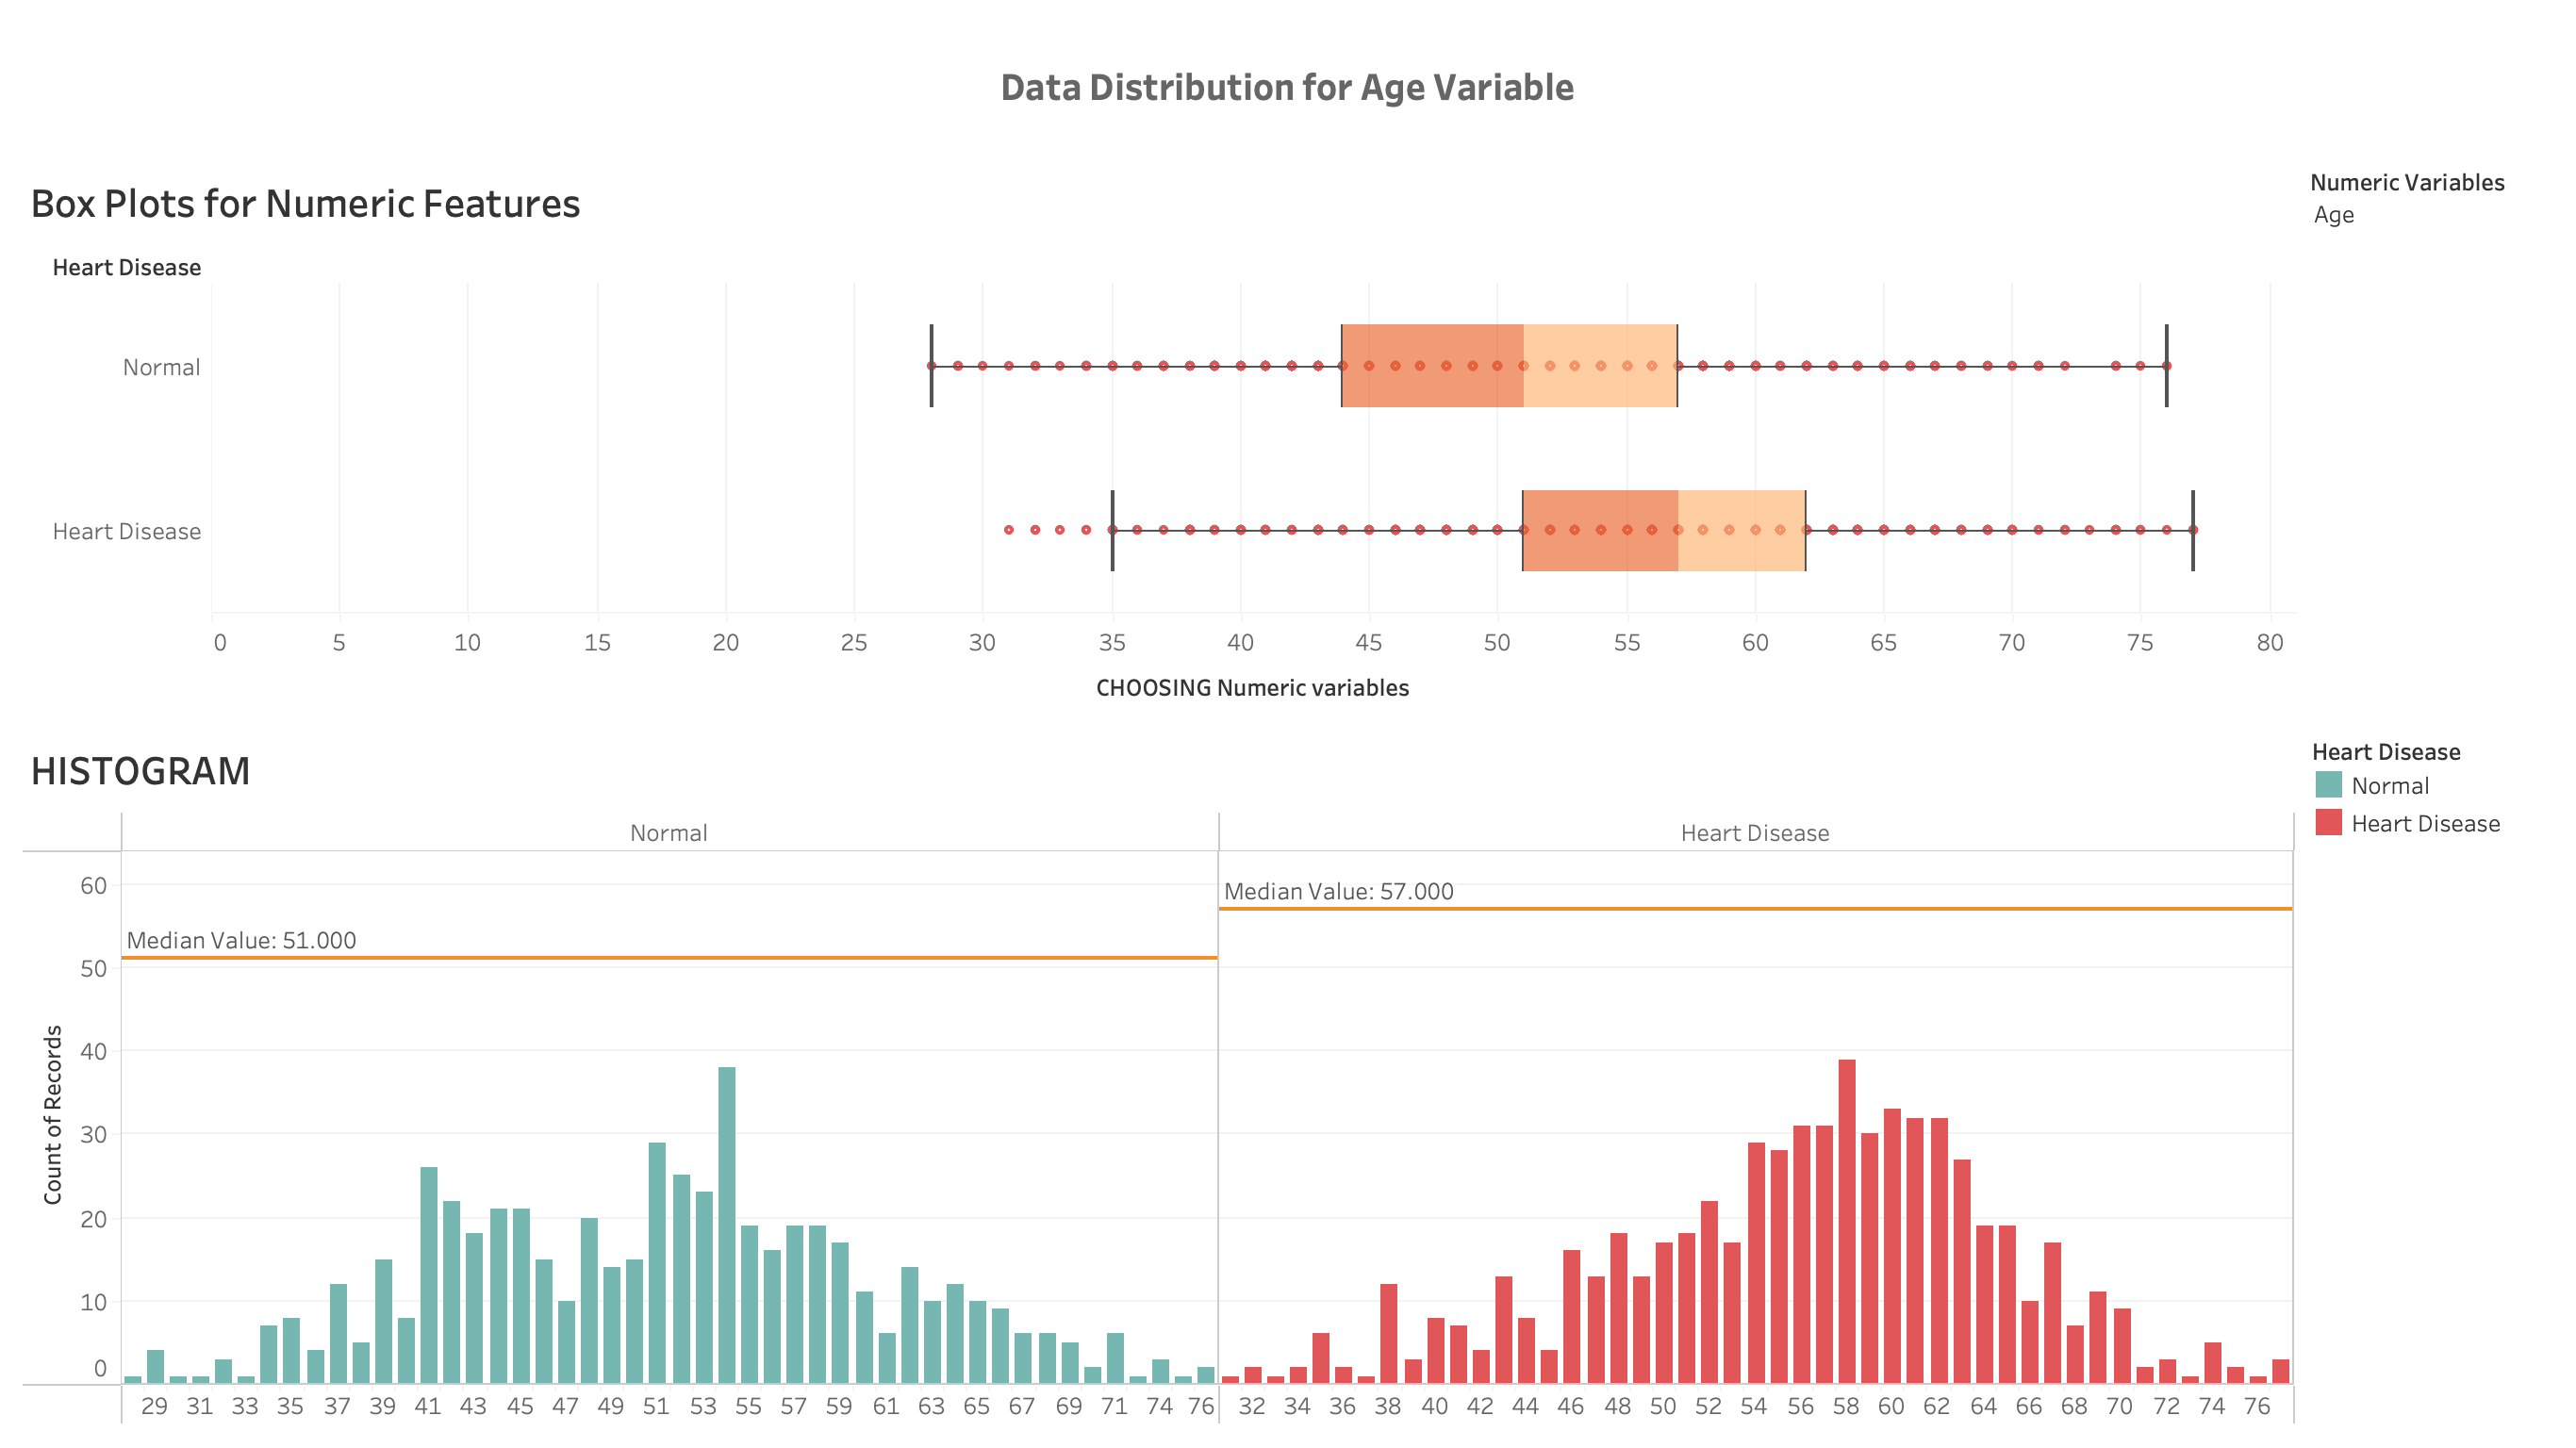

#### 2 - Resting Blood Pressure

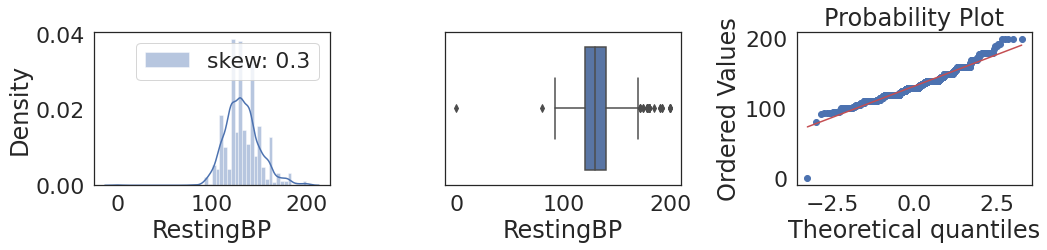

mean: 132.13877207737593, median: 130.0, mode: 120 std: 18.369250918287815, skew: 0.29537160290958, kurtosis: 2.762444197569121



<Figure size 1080x576 with 0 Axes>

In [39]:
plot_data_dist(heart_df,'RestingBP')

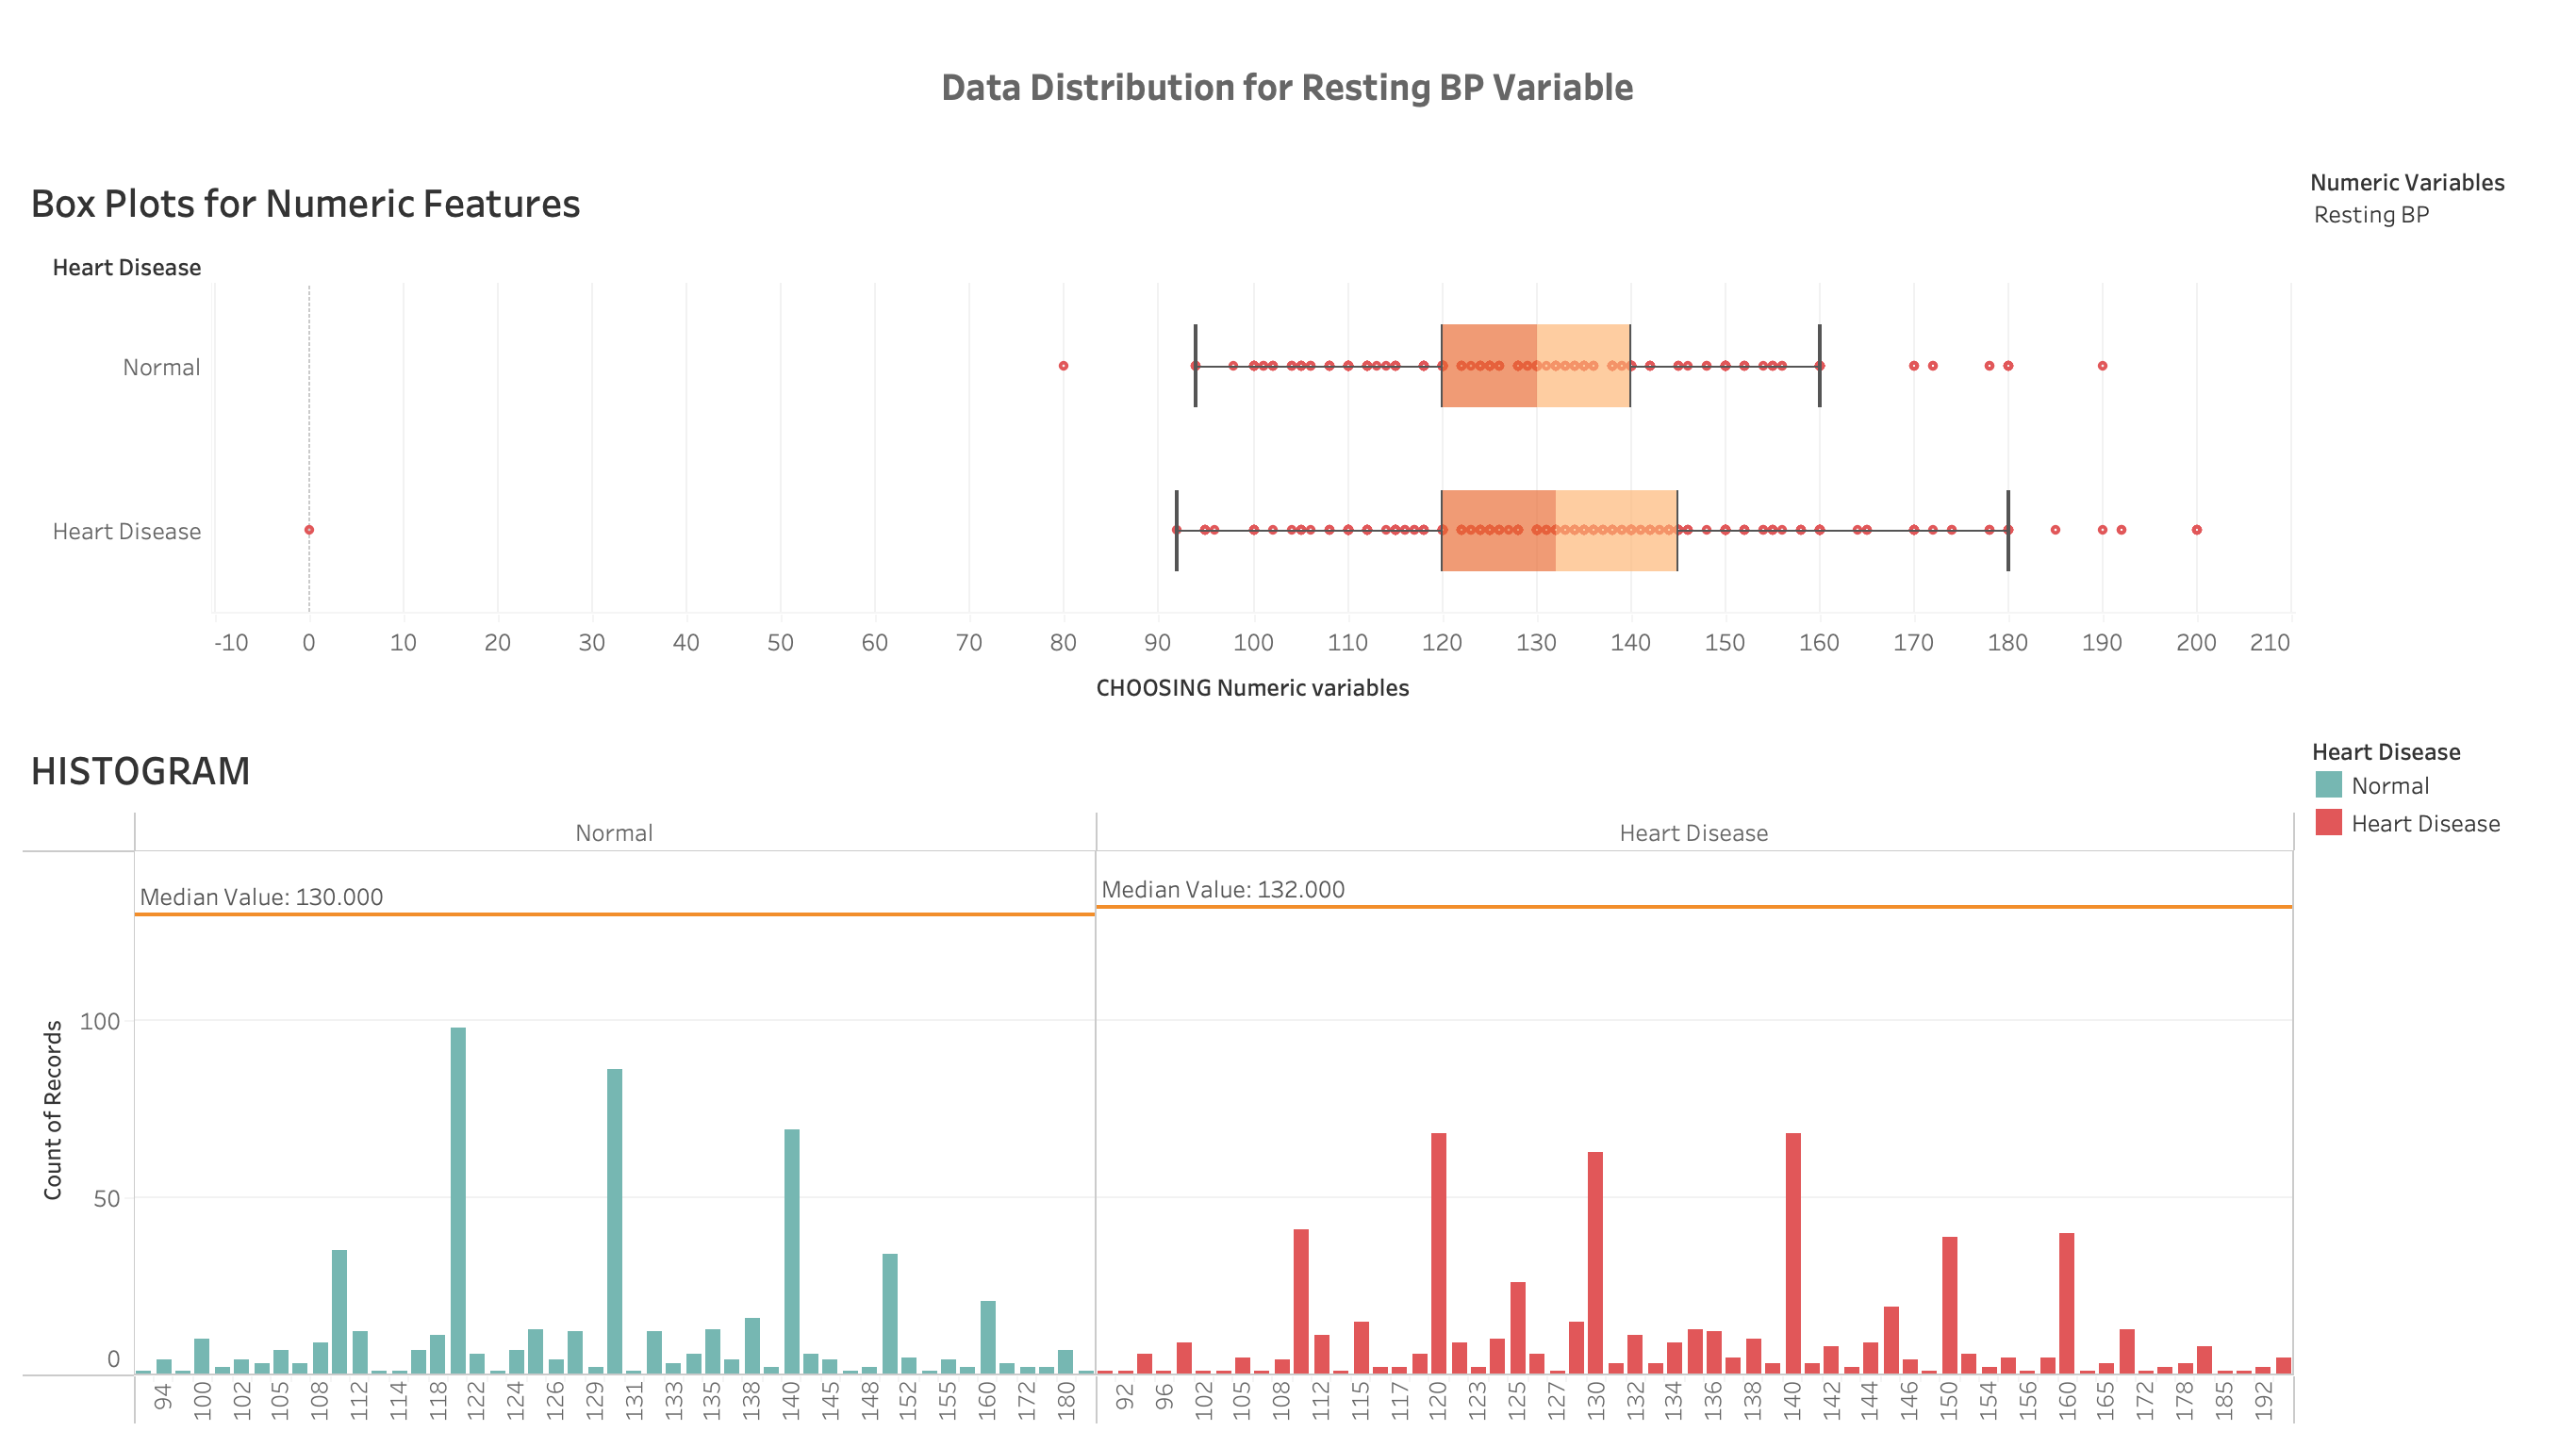

##### Handling outlier
Let's change the outlier to the median value.

In [40]:
def outlier_median(feature):
  heart_df[feature].replace(0, heart_df[feature].median(),inplace=True)

In [41]:
outlier_median('RestingBP')

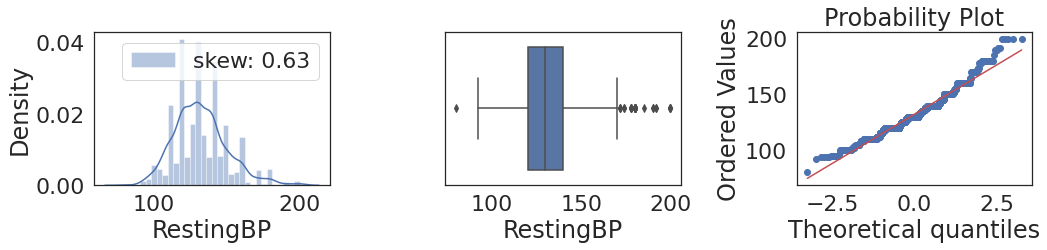

mean: 132.24810765349034, median: 130.0, mode: 120 std: 17.96451347272264, skew: 0.6330492245339018, kurtosis: 0.8080997979613915



<Figure size 1080x576 with 0 Axes>

In [42]:
plot_data_dist(heart_df,'RestingBP')

#### 3 - Cholesterol

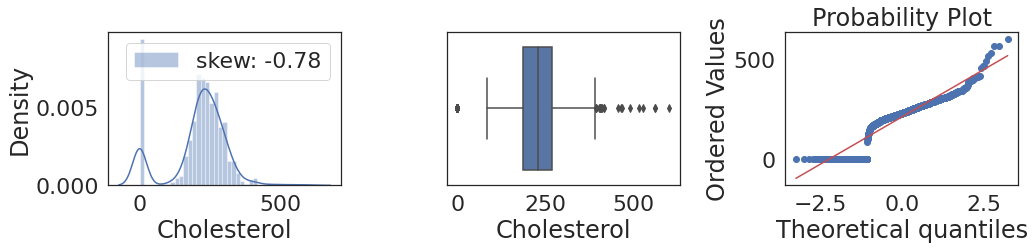

mean: 210.37678721614802, median: 229.0, mode: 0 std: 101.46218548606534, skew: -0.7817205751701504, kurtosis: 0.8215981127821488



<Figure size 1080x576 with 0 Axes>

In [43]:
plot_data_dist(heart_df,'Cholesterol')

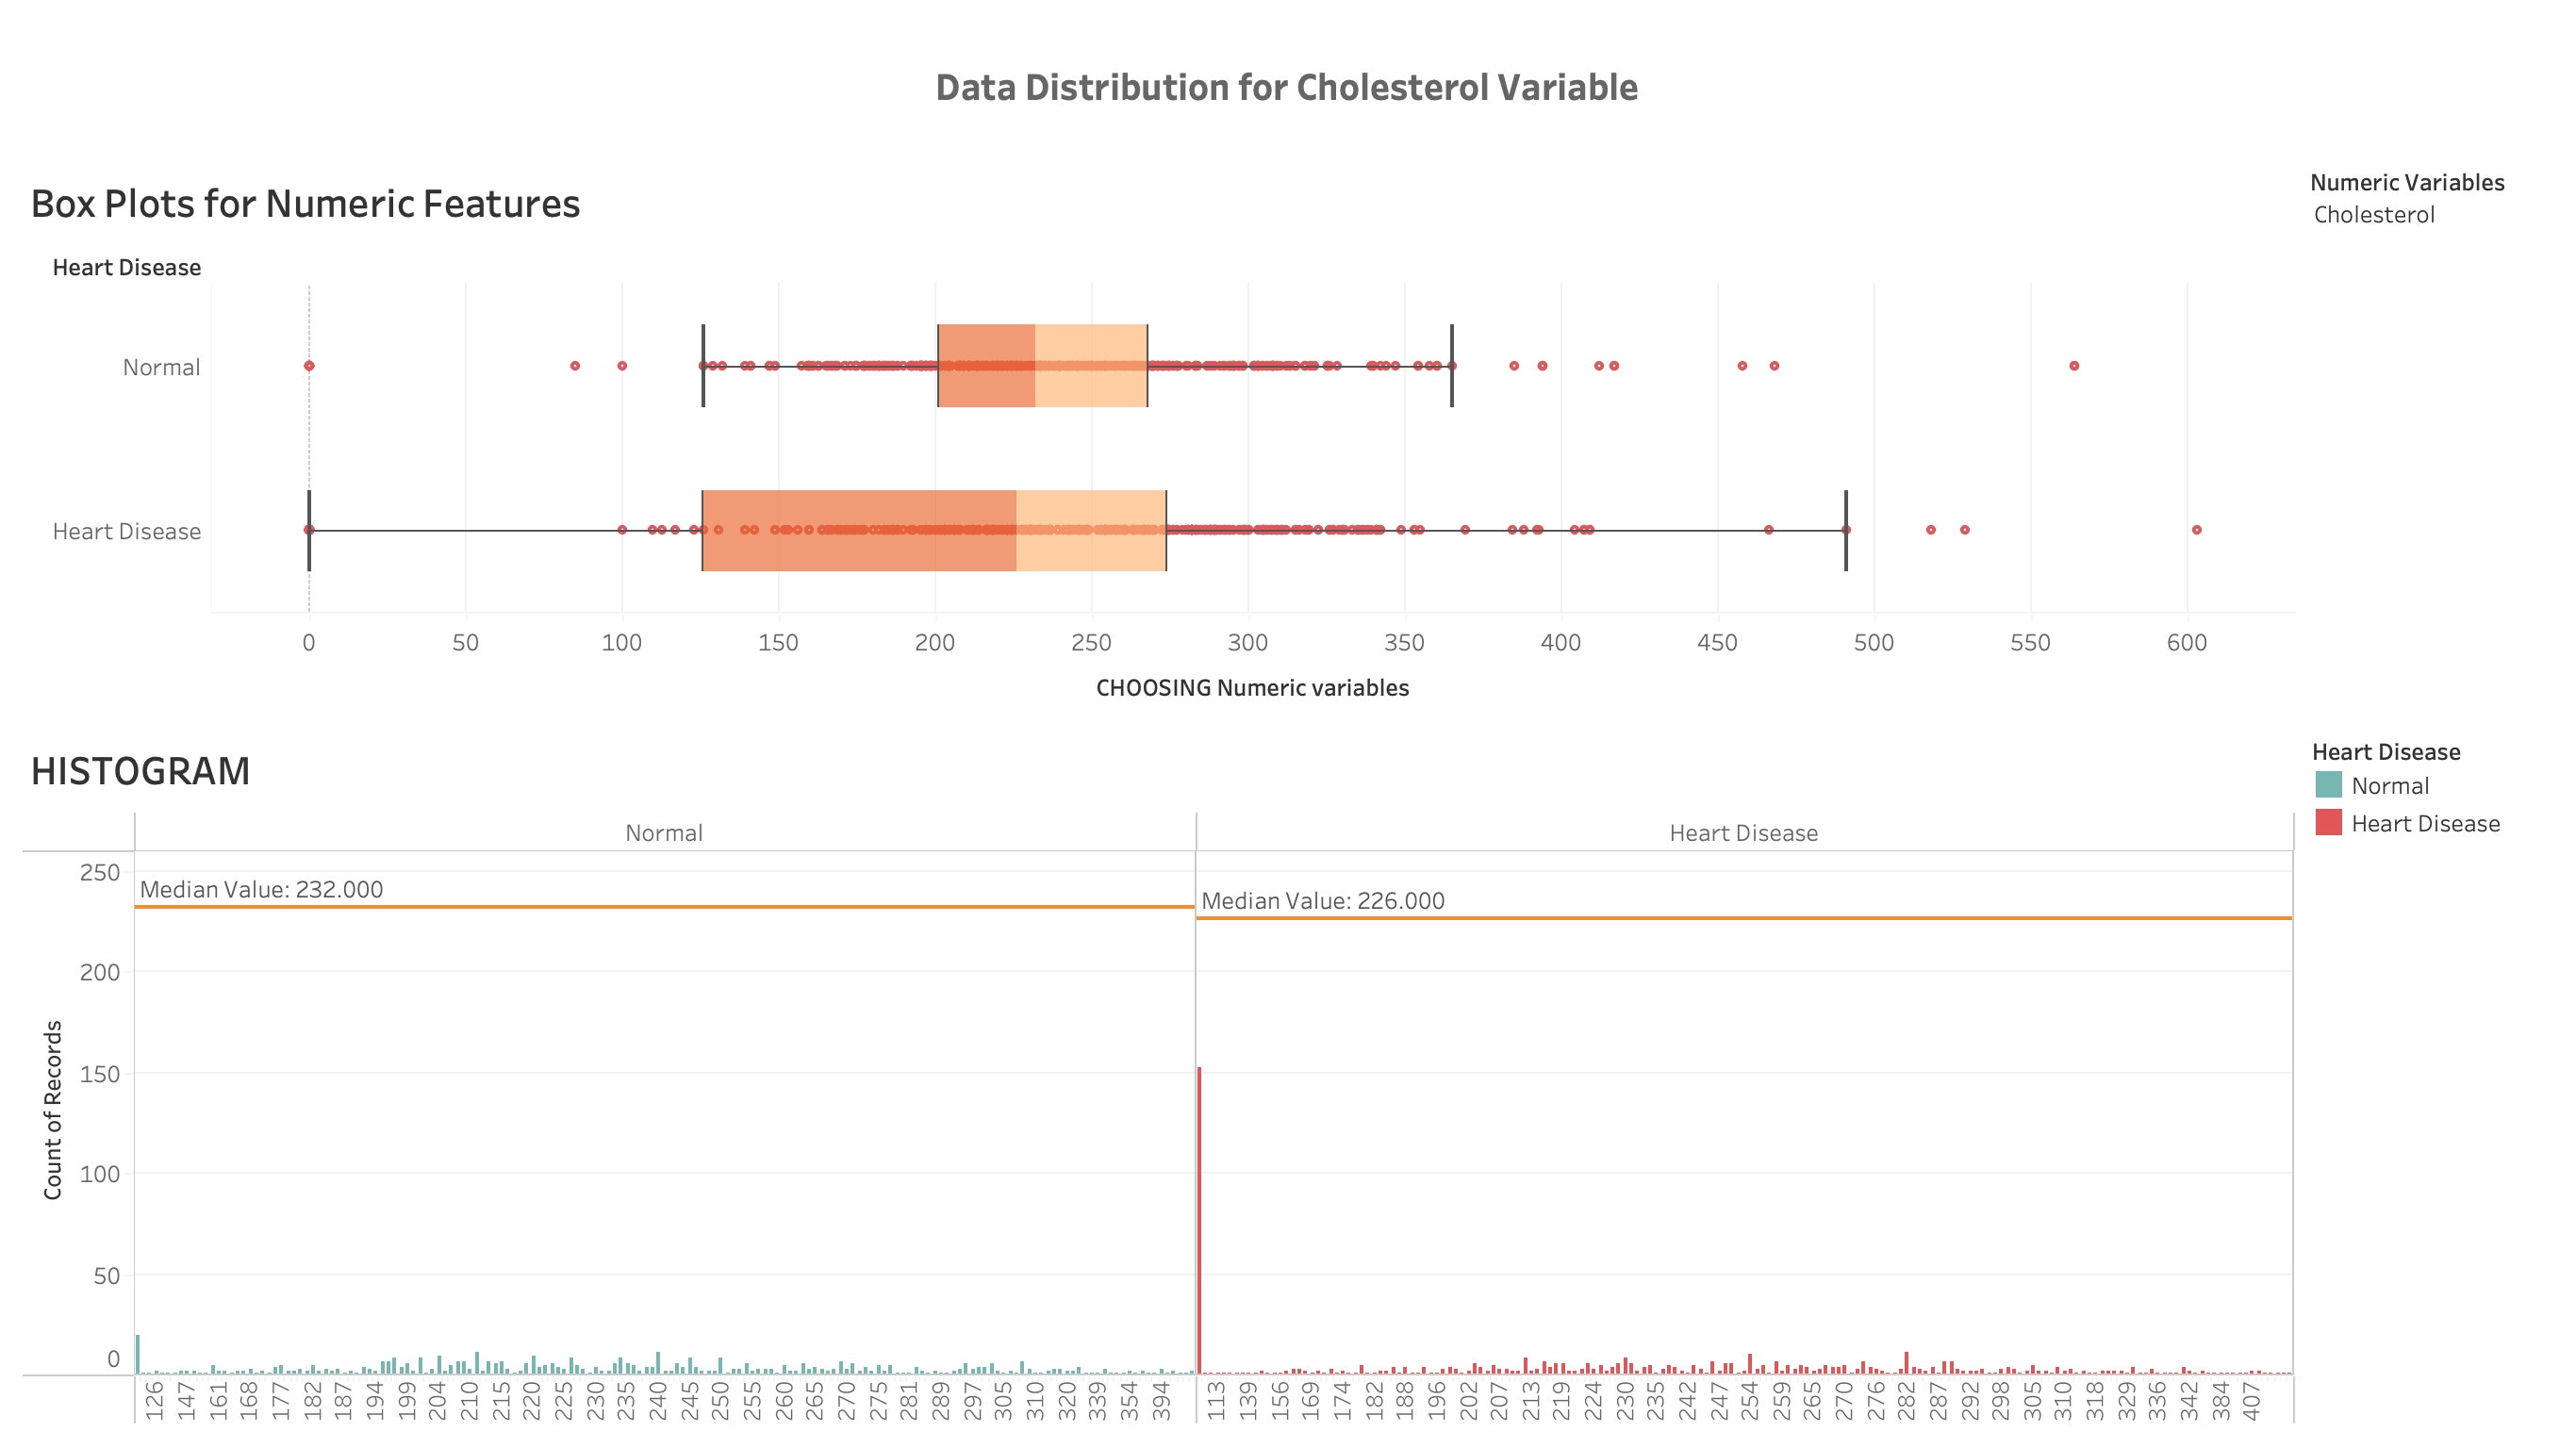

**The figure above shows values that are 0. A serum cholesterol level of 0 is not possible in practice, so it is likely to be considered out of the ordinary.**

##### Handling outlier
Let's change the outlier to the median value.

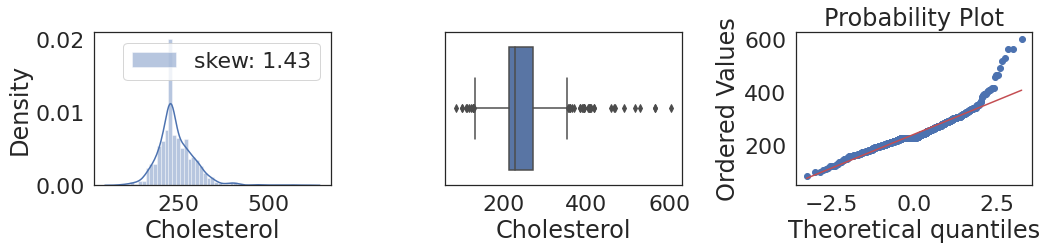

mean: 243.50378469301936, median: 229.0, mode: 229 std: 53.27932265933736, skew: 1.4262397369319078, kurtosis: 5.9420778192262205



<Figure size 1080x576 with 0 Axes>

In [44]:
outlier_median('Cholesterol')
plot_data_dist(heart_df,'Cholesterol')

**Outliers have been removed, and the skewness is stable** <br>



```
'Jesse Austin Knapp (USA) was measured to have a triglyceride reading of 3,410 mg/dl, 22.7 times the normal level of 150 mg/dl, based on a sample of his blood taken on 11 April 2022 at Ascension Providence Rochester Hospital, Michigan, USA
Jesse was diagnosed at the hospital with severe hypertriglyceridemia.'
https://www.guinnessworldrecords.com/
```



#### 4 - Maximum Heart Rate

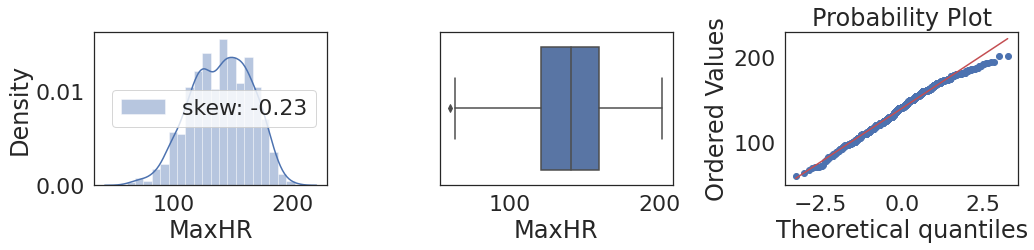

mean: 139.73927670311187, median: 141.0, mode: 150 std: 25.52738635972269, skew: -0.23376917574833778, kurtosis: -0.4618358954485058



<Figure size 1080x576 with 0 Axes>

In [45]:
plot_data_dist(heart_df,'MaxHR')

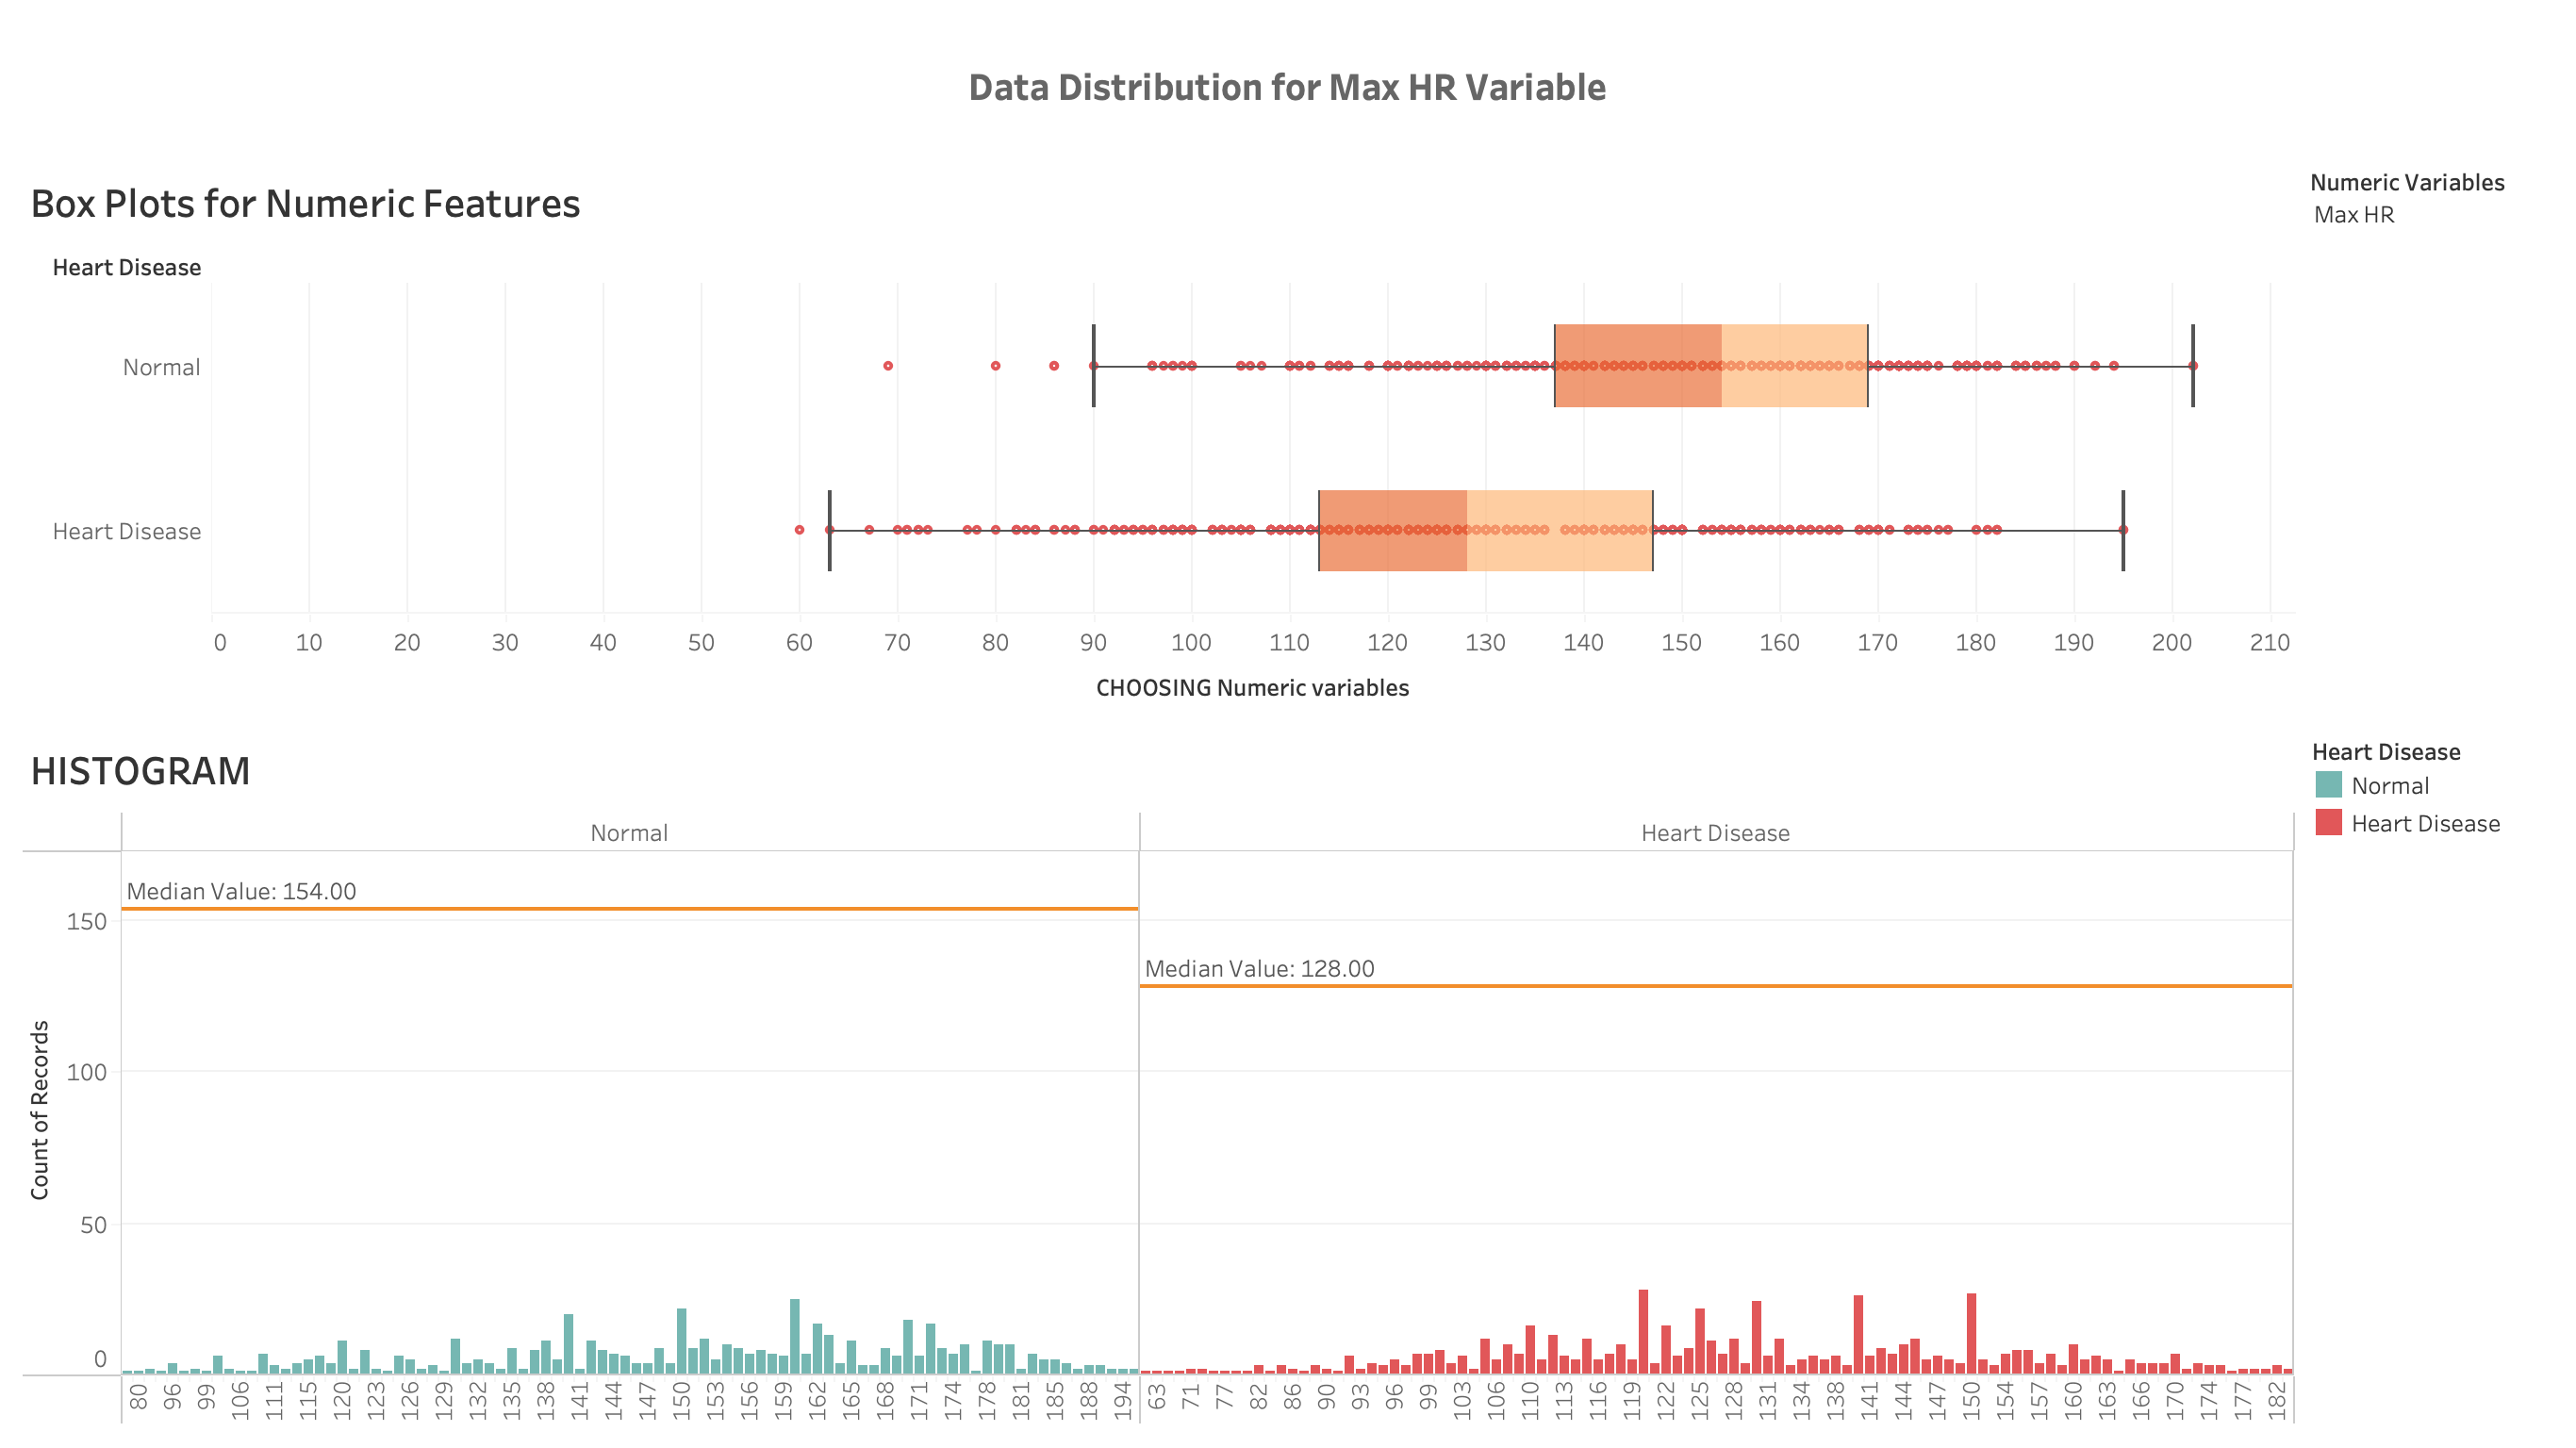

**OBSERVATION: There do not appear to be any outliers in the distribution of values, and the values appear to be normal distributed.**


#### 5 - Old Peak

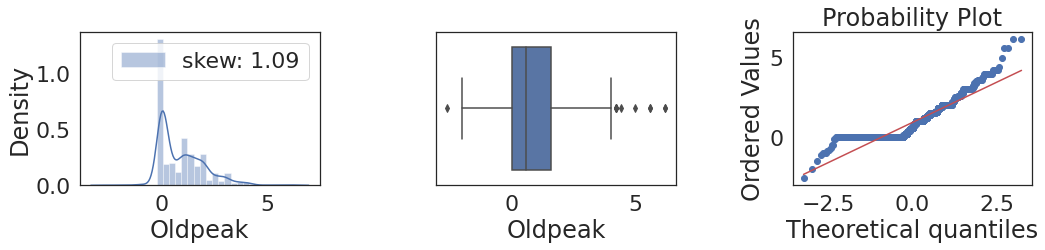

mean: 0.9235492010092516, median: 0.6, mode: 0.0 std: 1.0864642489681735, skew: 1.0929143015380878, kurtosis: 1.4066650964273921



<Figure size 1080x576 with 0 Axes>

In [46]:
plot_data_dist(heart_df,'Oldpeak')

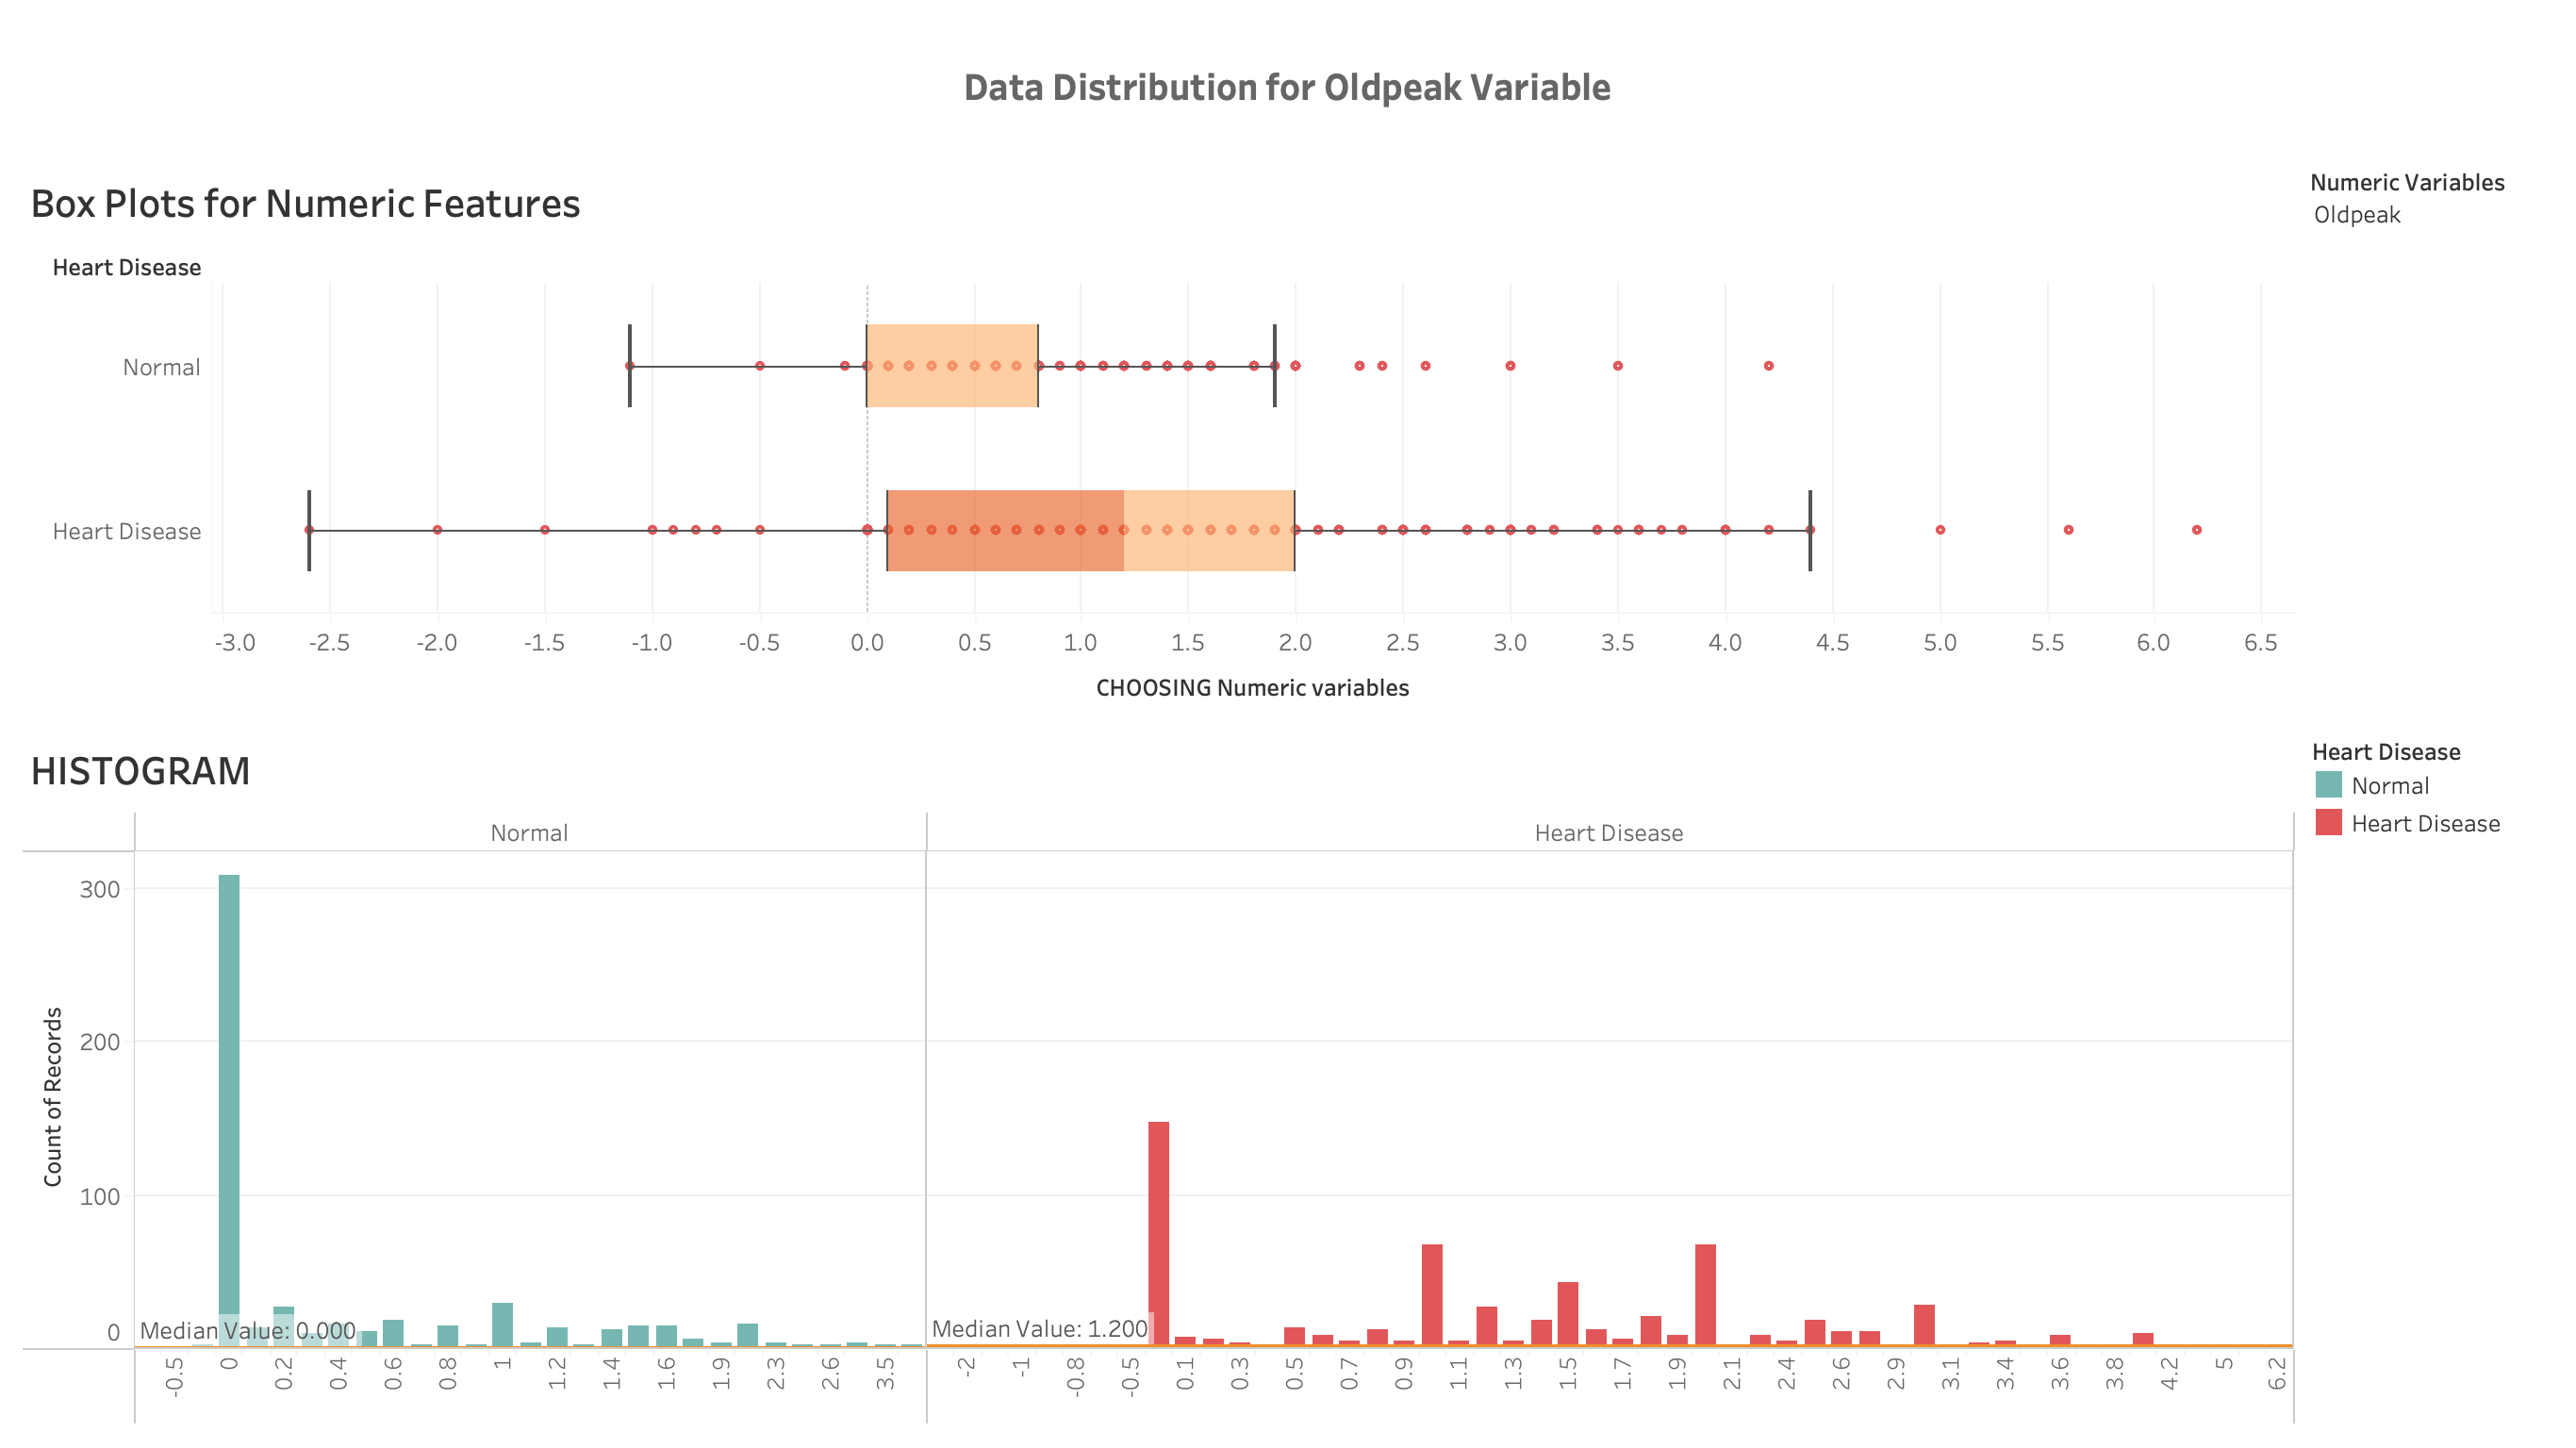

**OBSERVATION: Most datapoints have a value of zero, but it is hard to determine the range of normal values without domain knowledge.**

### One Hot Encoding

In [47]:
heart_df.describe().transpose()

count        mean        std   min    25%    50%    75%    max
Age           1189.0   53.708158   9.352961  28.0   47.0   54.0   60.0   77.0
RestingBP     1189.0  132.248108  17.964513  80.0  120.0  130.0  140.0  200.0
Cholesterol   1189.0  243.503785  53.279323  85.0  214.0  229.0  270.0  603.0
FastingBS     1189.0    0.212784   0.409448   0.0    0.0    0.0    0.0    1.0
MaxHR         1189.0  139.739277  25.527386  60.0  121.0  141.0  160.0  202.0
Oldpeak       1189.0    0.923549   1.086464  -2.6    0.0    0.6    1.6    6.2
HeartDisease  1189.0    0.528175   0.499416   0.0    0.0    1.0    1.0    1.0

In [48]:
heart_df = pd.get_dummies(heart_df,drop_first=True)
heart_df.describe().transpose()

count        mean        std   min    25%    50%    75%  \
Age                1189.0   53.708158   9.352961  28.0   47.0   54.0   60.0   
RestingBP          1189.0  132.248108  17.964513  80.0  120.0  130.0  140.0   
Cholesterol        1189.0  243.503785  53.279323  85.0  214.0  229.0  270.0   
FastingBS          1189.0    0.212784   0.409448   0.0    0.0    0.0    0.0   
MaxHR              1189.0  139.739277  25.527386  60.0  121.0  141.0  160.0   
Oldpeak            1189.0    0.923549   1.086464  -2.6    0.0    0.6    1.6   
HeartDisease       1189.0    0.528175   0.499416   0.0    0.0    1.0    1.0   
Sex_M              1189.0    0.763667   0.425008   0.0    1.0    1.0    1.0   
ChestPainType_ATA  1189.0    0.181665   0.385731   0.0    0.0    0.0    0.0   
ChestPainType_NAP  1189.0    0.237174   0.425529   0.0    0.0    0.0    0.0   
ChestPainType_TA   1189.0    0.055509   0.229067   0.0    0.0    0.0    0.0   
RestingECG_Normal  1189.0    0.574432   0.494637   0.0    0.0    1.0    1.0   
RestingECG_ST      1189.0    0.152229   0.359394   0.0    0.0    0.0    0.0   
ExerciseAngina_Y   1189.0    0.387721   0.487435   0.0    0.0    0.0    1.0   
ST_Slope_FLAT      1189.0    0.489487   0.500100   0.0    0.0    0.0    1.0   
ST_Slope_UP        1189.0    0.442389   0.496879   0.0    0.0    0.0    1.0   

                     max  
Age                 77.0  
RestingBP          200.0  
Cholesterol        603.0  
FastingBS            1.0  
MaxHR              202.0  
Oldpeak              6.2  
HeartDisease         1.0  
Sex_M                1.0  
ChestPainType_ATA    1.0  
ChestPainType_NAP    1.0  
ChestPainType_TA     1.0  
RestingECG_Normal    1.0  
RestingECG_ST        1.0  
ExerciseAngina_Y     1.0  
ST_Slope_FLAT        1.0  
ST_Slope_UP          1.0

###  Checking Feature Importance
`Choosing the right features to judge heart disease will help you make a more informed decision. This will also be very useful when explaining the diagnosis to patients.`

Text(0.5, 1.0, 'Correlation Plot')

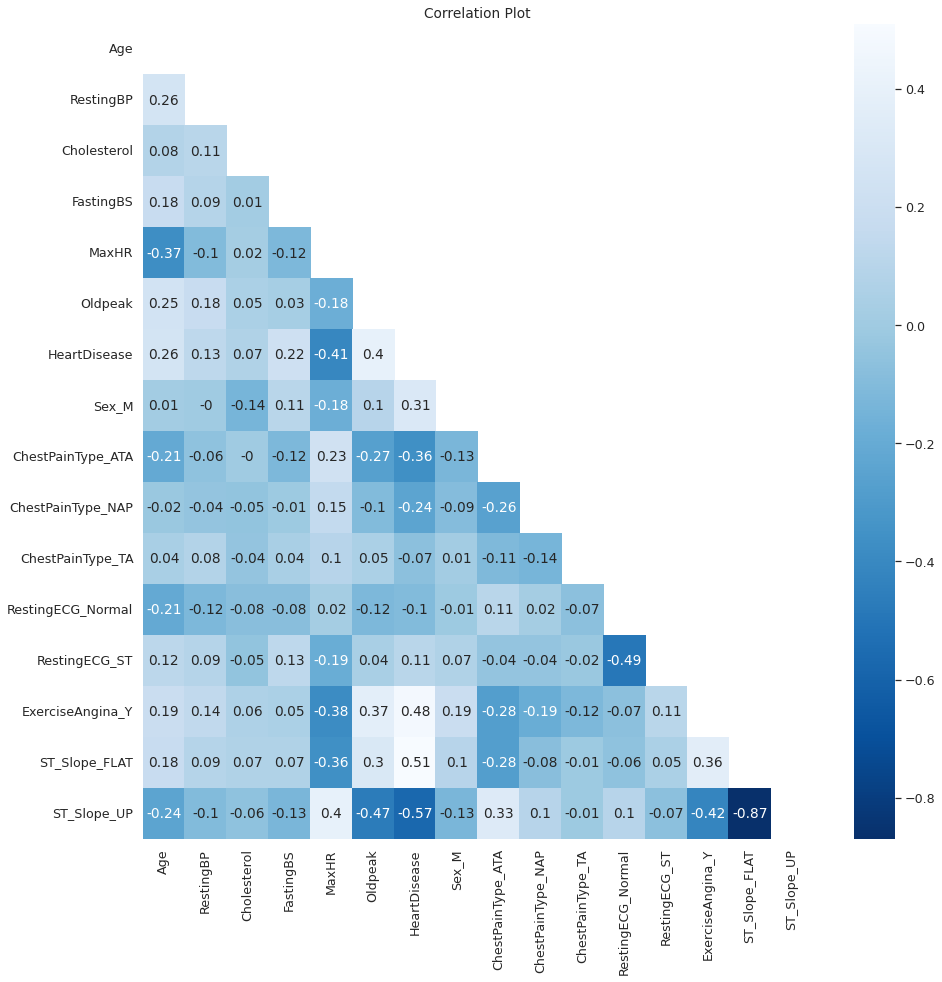

In [49]:
import numpy as np
corr=heart_df.corr().round(2)
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

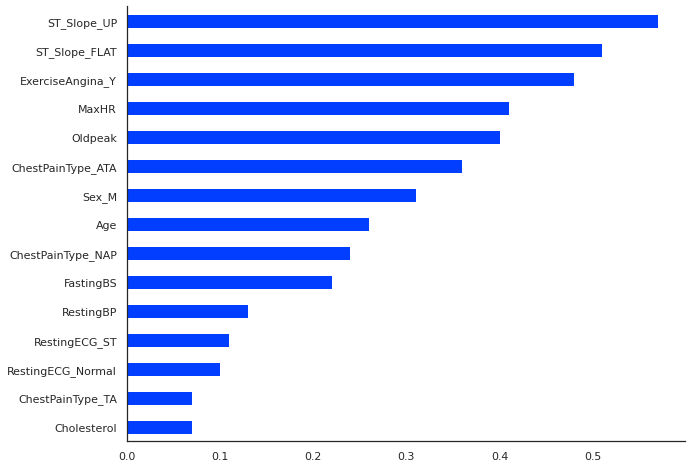

In [50]:
sns.set(font_scale=1)
plt.figure(figsize=(10,8))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

In [51]:
# segregating dataset into features i.e., X and target variables i.e., y
X = heart_df.drop(['HeartDisease'],axis=1)
y = heart_df['HeartDisease']

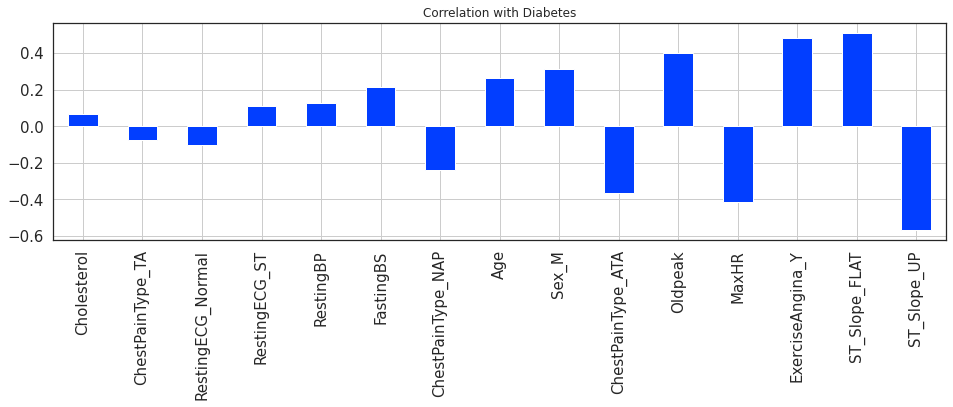

In [52]:
X.corrwith(y).sort_values(key = lambda dig: abs(dig)).plot.bar(
        figsize = (16, 4), 
        title = "Correlation with Diabetes", 
        fontsize = 15,
        rot = 90, grid = True)

In [53]:
heart_df_copy = heart_df.copy()
X_train = heart_df_copy.drop('HeartDisease',axis=1)
y_train = heart_df_copy.pop('HeartDisease')

In [54]:
all_cols = [cname for cname in X_train.columns]

In [55]:
all_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_FLAT',
 'ST_Slope_UP']

## MODELING

### Model Training

In [56]:
#!pip install pycaret

In [57]:
from pycaret.classification import *

In [ ]:
setup(data = heart_df, 
      target = 'HeartDisease',
      preprocess = False,
      numeric_features = all_cols,
      verbose = False,
      silent = True,
      session_id=927)

**Comparing all the models in the library to return the averaged cross-validated performance metrics**

In [59]:
top5_models = compare_models(
  n_select = 5,
  sort="Recall",
  exclude=['dummy','knn','svm','ridge'])

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9146  0.9546  0.9268  0.9136   
lightgbm  Light Gradient Boosting Machine    0.8978  0.9482  0.9110  0.8969   
et                 Extra Trees Classifier    0.8978  0.9566  0.9107  0.8963   
gbc          Gradient Boosting Classifier    0.8930  0.9457  0.9063  0.8923   
ada                  Ada Boost Classifier    0.8522  0.9100  0.8629  0.8578   
lda          Linear Discriminant Analysis    0.8462  0.9200  0.8605  0.8494   
lr                    Logistic Regression    0.8486  0.9204  0.8581  0.8544   
nb                            Naive Bayes    0.8438  0.9145  0.8536  0.8507   
qda       Quadratic Discriminant Analysis    0.8426  0.9038  0.8490  0.8519   
dt               Decision Tree Classifier    0.8389  0.8398  0.8217  0.8670   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9198  0.8286  0.8294     0.279  
lightgbm  0.9034  0.7950  0.7961     0.090  
et        0.9032  0.7949  0.7956     0.267  
gbc       0.8990  0.7853  0.7858     0.054  
ada       0.8600  0.7035  0.7043     0.045  
lda       0.8545  0.6914  0.6921     0.008  
lr        0.8560  0.6964  0.6969     0.369  
nb        0.8516  0.6867  0.6878     0.007  
qda       0.8499  0.6844  0.6853     0.009  
dt        0.8414  0.6781  0.6825     0.008

INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 2
INFO:logs:[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=927, verbose=0,
                       warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=927,

In [ ]:
print(top5_models)

**Use `create_model` to train the best performing model and get the trained model output that you can use for predictions.**

In [65]:
def create_model_custom(model_name):
  model = create_model(model_name,verbose=False)
  dt_results = pull()
  print(dt_results)
  return model


In [ ]:
# Train Random Forest Classifier Model
rf = create_model_custom('rf')

In [ ]:
# Train Light Gradient Boosting Machine	
lightgbm = create_model_custom('lightgbm')
# Train Extra Trees Classifier
et = create_model_custom('et')
# Train Gradient Boosting Classifier	
gbc = create_model_custom('gbc')
# Train Ada Boosting Classifier	
ada = create_model_custom('ada')

**WINNER: Random Forest Classifier** <br>
Accuracy:	0.9146 <br>
Recall:	0.9268

### Model Optimization

#### Model Tuning

In [81]:
def tune_model_custom(model_name):
  model = tune_model(model_name,verbose = False,choose_better = True)
  dt_results = pull()
  print(dt_results)
  return model

In [88]:
tuned_rf = tune_model_custom(rf)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=927, verbose=0,
                       warm_start=False), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=False, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:C

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9405  0.9574  0.9545  0.9333  0.9438  0.8805  0.8808
1       0.8571  0.9205  0.8864  0.8478  0.8667  0.7130  0.7138
2       0.9518  0.9715  0.9767  0.9333  0.9545  0.9033  0.9044
3       0.8554  0.9320  0.8837  0.8444  0.8636  0.7100  0.7108
4       0.9398  0.9866  0.9070  0.9750  0.9398  0.8797  0.8820
5       0.8554  0.9172  0.8409  0.8810  0.8605  0.7106  0.7115
6       0.9036  0.9569  0.9318  0.8913  0.9111  0.8060  0.8069
7       0.8916  0.9446  0.9091  0.8889  0.8989  0.7820  0.7823
8       0.8916  0.9237  0.8864  0.9070  0.8966  0.7827  0.7829
9       0.9157  0.9662  0.9318  0.9111  0.9213  0.8305  0.8307
Mean    0.9002  0.9477  0.9108  0.9013  0.9057  0.7998  0.8006
Std     0.0348  0.0226  0.0374  0.0379  0.0328  0.0698  0.0700


Random Forest Classifier
* Acc: 0.9146	
* Recall:0.9268

Tuned Random Forest Classifier    
* Acc: 0.9002  
* Recall: 0.9108

**WINNER: Random Forest Classifier**


In [83]:
tuned_lightgbm = tune_model_custom(lightgbm)
tuned_et = tune_model_custom(et)
tuned_gbc = tune_model_custom(gbc)
tuned_ada = tune_model_custom(ada)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=927, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=False, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Light G

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9167  0.9500  0.9318  0.9111  0.9213  0.8328  0.8330
1       0.8690  0.9142  0.8864  0.8667  0.8764  0.7372  0.7374
2       0.9277  0.9541  0.9302  0.9302  0.9302  0.8552  0.8552
3       0.8675  0.9430  0.9070  0.8478  0.8764  0.7339  0.7358
4       0.8916  0.9762  0.9070  0.8864  0.8966  0.7827  0.7829
5       0.8675  0.9038  0.8636  0.8837  0.8736  0.7344  0.7346
6       0.9157  0.9458  0.9318  0.9111  0.9213  0.8305  0.8307
7       0.8916  0.9283  0.8636  0.9268  0.8941  0.7833  0.7853
8       0.8434  0.9167  0.8864  0.8298  0.8571  0.6842  0.6860
9       0.9157  0.9650  0.9091  0.9302  0.9195  0.8310  0.8312
Mean    0.8906  0.9397  0.9017  0.8924  0.8967  0.7805  0.7812
Std     0.0266  0.0222  0.0247  0.0338  0.0241  0.0537  0.0532


INFO:logs:best_params: {'actual_estimator__n_estimators': 190, 'actual_estimator__min_samples_split': 9, 'actual_estimator__min_samples_leaf': 3, 'actual_estimator__min_impurity_decrease': 0, 'actual_estimator__max_features': 'sqrt', 'actual_estimator__max_depth': 11, 'actual_estimator__criterion': 'gini', 'actual_estimator__class_weight': {}, 'actual_estimator__bootstrap': False}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
  

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8810  0.9335  0.9318  0.8542  0.8913  0.7603  0.7638
1       0.8214  0.9125  0.8636  0.8085  0.8352  0.6408  0.6425
2       0.8916  0.9529  0.9070  0.8864  0.8966  0.7827  0.7829
3       0.8313  0.9076  0.8605  0.8222  0.8409  0.6616  0.6624
4       0.8795  0.9692  0.8837  0.8837  0.8837  0.7587  0.7587
5       0.8675  0.9068  0.8864  0.8667  0.8764  0.7336  0.7338
6       0.8313  0.9435  0.8636  0.8261  0.8444  0.6604  0.6612
7       0.8675  0.9266  0.8636  0.8837  0.8736  0.7344  0.7346
8       0.8313  0.9038  0.8182  0.8571  0.8372  0.6624  0.6632
9       0.8795  0.9528  0.8864  0.8864  0.8864  0.7582  0.7582
Mean    0.8582  0.9309  0.8765  0.8575  0.8666  0.7153  0.7161
Std     0.0250  0.0219  0.0290  0.0279  0.0231  0.0502  0.0501


INFO:logs:best_params: {'actual_estimator__subsample': 0.45, 'actual_estimator__n_estimators': 70, 'actual_estimator__min_samples_split': 7, 'actual_estimator__min_samples_leaf': 2, 'actual_estimator__min_impurity_decrease': 0.0002, 'actual_estimator__max_features': 'sqrt', 'actual_estimator__max_depth': 10, 'actual_estimator__learning_rate': 0.15}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
              

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9167  0.9716  0.9318  0.9111  0.9213  0.8328  0.8330
1       0.8571  0.9193  0.8864  0.8478  0.8667  0.7130  0.7138
2       0.9639  0.9645  0.9767  0.9545  0.9655  0.9276  0.9278
3       0.8675  0.9198  0.8837  0.8636  0.8736  0.7344  0.7346
4       0.9277  0.9849  0.9302  0.9302  0.9302  0.8552  0.8552
5       0.8916  0.9225  0.9091  0.8889  0.8989  0.7820  0.7823
6       0.9036  0.9575  0.9318  0.8913  0.9111  0.8060  0.8069
7       0.9277  0.9411  0.9318  0.9318  0.9318  0.8549  0.8549
8       0.8795  0.9330  0.9091  0.8696  0.8889  0.7575  0.7583
9       0.9036  0.9650  0.9091  0.9091  0.9091  0.8065  0.8065
Mean    0.9039  0.9479  0.9200  0.8998  0.9097  0.8070  0.8073
Std     0.0303  0.0226  0.0256  0.0321  0.0281  0.0608  0.0607


INFO:logs:best_params: {'actual_estimator__n_estimators': 60, 'actual_estimator__learning_rate': 0.2, 'actual_estimator__algorithm': 'SAMME.R'}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=927), fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=True, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7f6726c14bd0>, return_train_score=False, kwargs={'n_estimators': 60, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying trai

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8690  0.9199  0.8636  0.8837  0.8736  0.7378  0.7380
1       0.7976  0.8949  0.7955  0.8140  0.8046  0.5948  0.5949
2       0.8916  0.9387  0.8837  0.9048  0.8941  0.7830  0.7833
3       0.7952  0.9145  0.8140  0.7955  0.8046  0.5895  0.5896
4       0.8916  0.9483  0.9070  0.8864  0.8966  0.7827  0.7829
5       0.8313  0.8735  0.8409  0.8409  0.8409  0.6614  0.6614
6       0.8795  0.9382  0.8864  0.8864  0.8864  0.7582  0.7582
7       0.8434  0.9167  0.7955  0.8974  0.8434  0.6879  0.6929
8       0.8313  0.9193  0.8409  0.8409  0.8409  0.6614  0.6614
9       0.9036  0.9452  0.9318  0.8913  0.9111  0.8060  0.8069
Mean    0.8534  0.9209  0.8559  0.8641  0.8596  0.7063  0.7070
Std     0.0373  0.0222  0.0443  0.0363  0.0362  0.0747  0.0747


**WINNERS:** <br>
**Light Gradient Boosting Machine**<br>
**Extra Trees Classifier**<br>
**TUNED Gradient Boosting Classifier**<br>
**Ada Boost Classifier**

**Stacking** <br>
Stacking is the process of combining various estimators in order to reduce their biases. Predictions from each estimator are stacked together and used as input to a final estimator (usually called a meta-model) that computes the final prediction. Training of the final estimator happens via cross-validation.

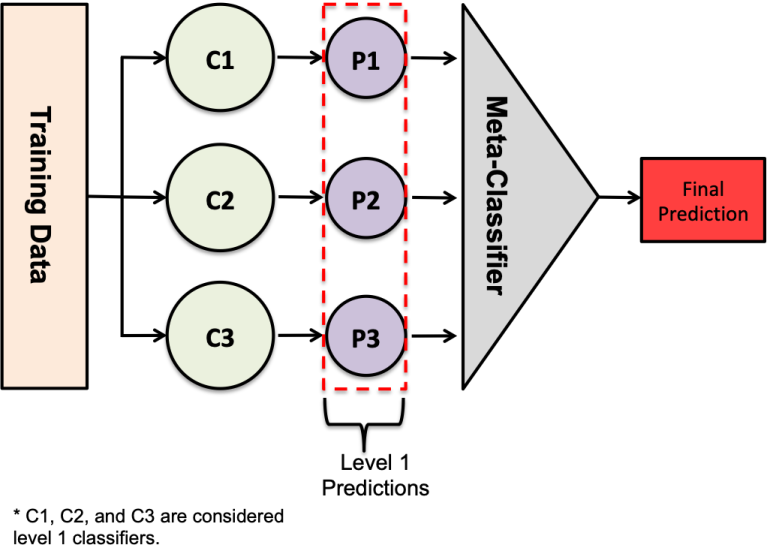

In [87]:
stack_model = stack_models(estimator_list = [tuned_rf,tuned_lightgbm,tuned_et,tuned_gbc,tuned_ada], meta_model = tuned_rf,optimize = 'Recall',choose_better=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9286  0.9690  0.9545  0.9130  0.9333  0.8565  0.8575
1       0.8929  0.9233  0.9091  0.8889  0.8989  0.7850  0.7852
2       0.9639  0.9863  0.9767  0.9545  0.9655  0.9276  0.9278
3       0.8554  0.9038  0.9070  0.8298  0.8667  0.7095  0.7128
4       0.9398  0.9895  0.9302  0.9524  0.9412  0.8795  0.8797
5       0.8554  0.9443  0.8636  0.8636  0.8636  0.7098  0.7098
6       0.9277  0.9586  1.0000  0.8800  0.9362  0.8536  0.8629
7       0.9036  0.9502  0.9318  0.8913  0.9111  0.8060  0.8069
8       0.8916  0.9344  0.9318  0.8723  0.9011  0.7814  0.7835
9       0.9398  0.9650  0.9318  0.9535  0.9425  0.8793  0.8795
Mean    0.9099  0.9525  0.9337  0.8999  0.9160  0.8188  0.8206
Std     0.0346  0.0257  0.0360  0.0405  0.0320  0.0695  0.0695

INFO:logs:create_model_container: 63
INFO:logs:master_model_container: 63
INFO:logs:display_container: 28
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,


Recall = 0.9337 (rf Recall: 0.9268) <br>
**WINNER: StackingClassifier 'stack_model'**

### Blending
Blending is similar to stacking, but uses a holdout set from the training set to make predictions. So, predictions are done on the holdout set only. The predictions and holdout set are used to build a final model that makes predictions on the test set. 

#### Blend_soft 

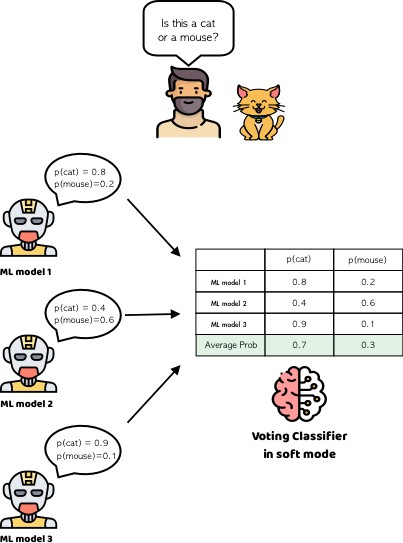

In [84]:
blend_soft = blend_models(estimator_list = [tuned_rf,tuned_lightgbm,tuned_et,tuned_gbc,tuned_ada], optimize = 'Recall',method = 'soft',choose_better=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9524  0.9756  0.9545  0.9545  0.9545  0.9045  0.9045
1       0.8690  0.9273  0.8864  0.8667  0.8764  0.7372  0.7374
2       0.9518  0.9814  0.9767  0.9333  0.9545  0.9033  0.9044
3       0.8554  0.9413  0.9070  0.8298  0.8667  0.7095  0.7128
4       0.9398  0.9919  0.9302  0.9524  0.9412  0.8795  0.8797
5       0.8675  0.9237  0.8636  0.8837  0.8736  0.7344  0.7346
6       0.9036  0.9662  0.9545  0.8750  0.9130  0.8054  0.8092
7       0.9157  0.9516  0.9318  0.9111  0.9213  0.8305  0.8307
8       0.9157  0.9470  0.9318  0.9111  0.9213  0.8305  0.8307
9       0.9277  0.9679  0.9091  0.9524  0.9302  0.8553  0.8563
Mean    0.9099  0.9574  0.9246  0.9070  0.9153  0.8190  0.8200
Std     0.0336  0.0217  0.0322  0.0403  0.0311  0.0676  0.0672

INFO:logs:create_model_container: 50
INFO:logs:master_model_container: 50
INFO:logs:display_container: 25
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=927, verbose=0,
                       warm_start=False)
INFO:logs:blend_models() succesfully completed......................................


Recall = 0.9246 (rf Recall: 0.9268) <br>
**WINNER: RandomForestClassifier 'rf'**



#### Blend_hard

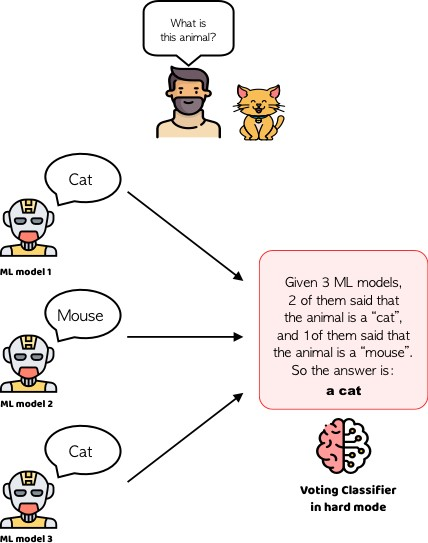

In [85]:
blend_hard = blend_models(estimator_list = [tuned_rf,tuned_lightgbm,tuned_et,tuned_gbc,tuned_ada], optimize = 'Recall',method = 'hard',choose_better=True)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.9643  0.0  0.9545  0.9767  0.9655  0.9285  0.9288
1       0.8690  0.0  0.8864  0.8667  0.8764  0.7372  0.7374
2       0.9639  0.0  0.9767  0.9545  0.9655  0.9276  0.9278
3       0.8434  0.0  0.8837  0.8261  0.8539  0.6855  0.6873
4       0.9518  0.0  0.9535  0.9535  0.9535  0.9035  0.9035
5       0.8795  0.0  0.8864  0.8864  0.8864  0.7582  0.7582
6       0.9157  0.0  0.9773  0.8776  0.9247  0.8295  0.8357
7       0.9157  0.0  0.9318  0.9111  0.9213  0.8305  0.8307
8       0.9277  0.0  0.9545  0.9130  0.9333  0.8545  0.8555
9       0.9277  0.0  0.9091  0.9524  0.9302  0.8553  0.8563
Mean    0.9159  0.0  0.9314  0.9118  0.9211  0.8310  0.8321
Std     0.0387  0.0  0.0354  0.0454  0.0360  0.0778  0.0776

INFO:logs:create_model_container: 56
INFO:logs:master_model_container: 56
INFO:logs:display_container: 26
INFO:logs:VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                 

Recall = 0.9314 (rf Recall: 0.9268) <br>

**WINNER: VotingClassifier 'blend_hard'**

---



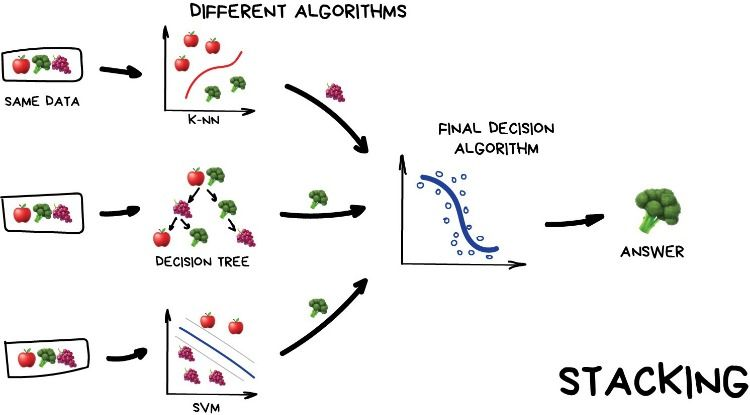

Recall = 0.9337 (rf Recall: 0.9268) <br>
**WINNER: StackingClassifier 'stack_model'**

Recall = 0.9246 (rf Recall: 0.9268) <br>
WINNER: RandomForestClassifier 'rf'

Recall = 0.9314 (rf Recall: 0.9268) <br>
WINNER: VotingClassifier 'blend_hard'

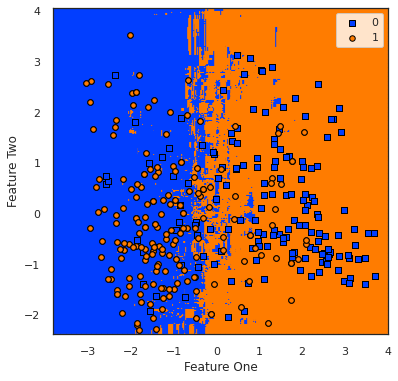

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [89]:
sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(6, 6))
plot_model(stack_model, plot='boundary')

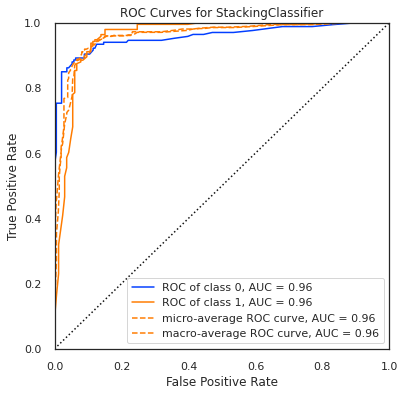

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [90]:
sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(6, 6))
plot_model(stack_model, plot = 'auc')

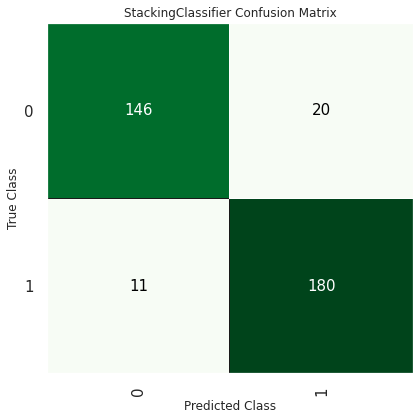

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [91]:
sns.set(font_scale=1)
plt.figure(figsize=(6, 6))
plot_model(stack_model, plot='confusion_matrix')

In [95]:
#plot_model(stack_model,plot='calibration')

### Calibrating the final model
This function calibrates the probability of a given estimator using isotonic or logistic regression.

When judging the performance of the above three ensemble models by recall, the soft voting model has the best performance. Therefore, the soft voting model is selected as the final model and calibration is performed.

In [93]:
cali_model = calibrate_model(stack_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9524  0.9653  0.9545  0.9545  0.9545  0.9045  0.9045
1       0.8690  0.9261  0.8864  0.8667  0.8764  0.7372  0.7374
2       0.9639  0.9878  0.9767  0.9545  0.9655  0.9276  0.9278
3       0.8675  0.9273  0.9302  0.8333  0.8791  0.7334  0.7389
4       0.9518  0.9831  0.9535  0.9535  0.9535  0.9035  0.9035
5       0.8554  0.9289  0.8409  0.8810  0.8605  0.7106  0.7115
6       0.9277  0.9604  0.9773  0.8958  0.9348  0.8540  0.8581
7       0.9036  0.9510  0.9318  0.8913  0.9111  0.8060  0.8069
8       0.9036  0.9388  0.9545  0.8750  0.9130  0.8054  0.8092
9       0.9398  0.9674  0.9318  0.9535  0.9425  0.8793  0.8795
Mean    0.9135  0.9536  0.9338  0.9059  0.9191  0.8262  0.8277
Std     0.0375  0.0217  0.0399  0.0424  0.0351  0.0753  0.0746

INFO:logs:create_model_container: 66
INFO:logs:master_model_container: 66
INFO:logs:display_container: 30
INFO:logs:CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('rf',
                                                                      RandomForestClassifier(bootstrap=True,
                                                                                             ccp_alpha=0.0,
                                                                                             class_weight=None,
                                                                                             criterion='gini',
                                                                                             max_depth=None,
                                                                                             max_features='auto',
                                                                                  

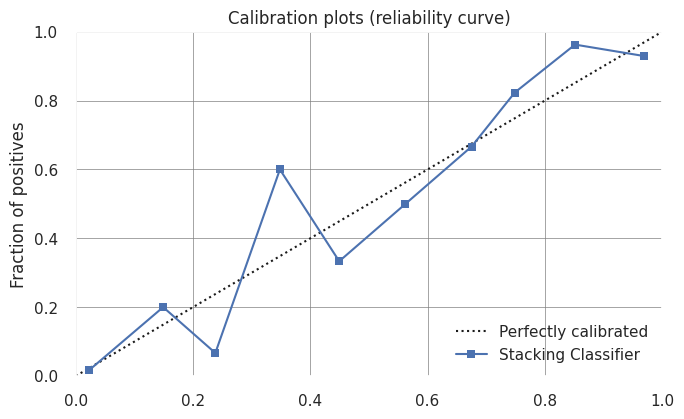

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [94]:
plot_model(cali_model,plot='calibration')

### Finalize Model
Trains the model on the entire dataset including the hold-out set.

In [96]:
final_model = finalize_model(cali_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('rf',
                                                                      RandomForestClassifier(bootstrap=True,
                                                                                             ccp_alpha=0.0,
                                                                                             class_weight=None,
                                                                                             criterion='gini',
                                                                                             max_depth=None,
                                                                                             max_features='auto',
                                                                                             max_leaf_nodes=None,
         

#### Boundary

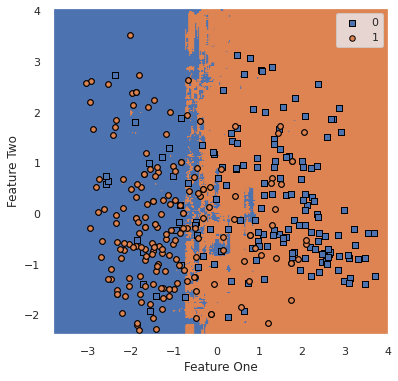

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [97]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='boundary')

#### Confusion Matrix

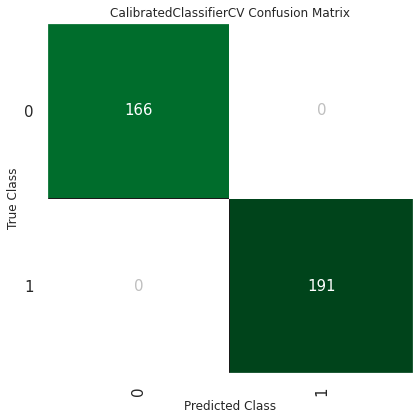

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [98]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

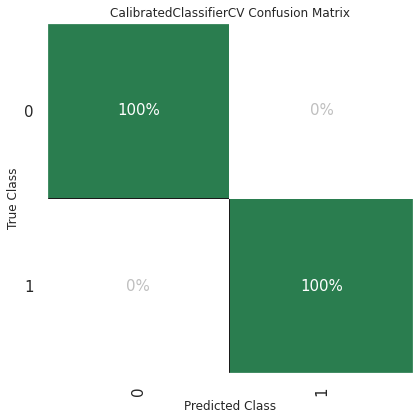

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [101]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

#### Classification Report

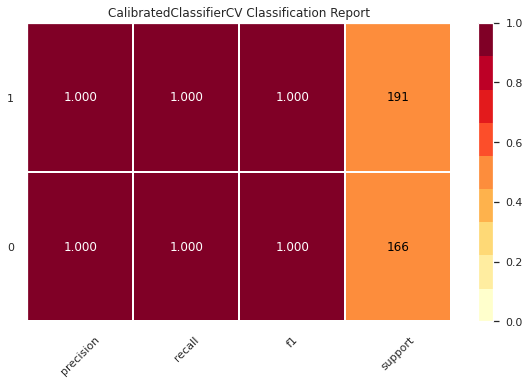

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [102]:
plot_model(final_model, plot = 'class_report', plot_kwargs = {'percent' : True})

### Model Testing

In [105]:
pred_df = predict_model(final_model, heart_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('rf',
                                                                      RandomForestClassifier(bootstrap=True,
                                                                                             ccp_alpha=0.0,
                                                                                             class_weight=None,
                                                                                             criterion='gini',
                                                                                             max_depth=None,
                                                                                             max_features='auto',
                                                                                             max_leaf_nodes=None,
           

Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Stacking Classifier       1.0  1.0     1.0    1.0  1.0    1.0  1.0

In [106]:
pred_df.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_FLAT  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_UP  Label   Score  
0            1      0  0.9729  
1            0      1  0.6984  
2            1      0  0.9703  
3            0      1  0.9539  
4            1      0  0.9740

In [107]:
pred_df[['HeartDisease', 'Label','Score']]

HeartDisease  Label   Score
0                0      0  0.9729
1                1      1  0.6984
2                0      0  0.9703
3                1      1  0.9539
4                0      0  0.9740
...            ...    ...     ...
1185             1      1  0.9529
1186             1      1  0.9602
1187             1      1  0.9599
1188             1      1  0.7407
1189             0      0  0.9664

[1189 rows x 3 columns]

### Model Saving

In [108]:
save_model(final_model,model_name ='/content/drive/MyDrive/0_data_science/Saved_Models/Heart-Disease-Classification/recall_1_-sept27' )

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('rf',
                                                                      RandomForestClassifier(bootstrap=True,
                                                                                             ccp_alpha=0.0,
                                                                                             class_weight=None,
                                                                                             criterion='gini',
                                                                                             max_depth=None,
                                                                                             max_features='auto',
                                                                                             max_leaf_nodes=None,
                     

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Age', 'RestingBP',
                                                           'Cholesterol',
                                                           'FastingBS', 'MaxHR',
                                                           'Oldpeak', 'Sex_M',
                                                           'ChestPainType_ATA',
                                                           'ChestPainType_NAP',
                                                           'ChestPainType_TA',
                                                           'RestingECG_Normal',
                                                   

In [109]:
model = load_model('/content/drive/MyDrive/0_data_science/Saved_Models/Heart-Disease-Classification/recall_1_-sept27')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=/content/drive/MyDrive/0_data_science/Saved_Models/Heart-Disease-Classification/recall_1_-sept27, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [110]:
pred_df[['HeartDisease', 'Label','Score']].head(10)

HeartDisease  Label   Score
0             0      0  0.9729
1             1      1  0.6984
2             0      0  0.9703
3             1      1  0.9539
4             0      0  0.9740
5             0      0  0.9526
6             0      0  0.9744
7             0      0  0.9736
8             1      1  0.9497
9             0      0  0.9744

In [111]:
model.predict(heart_df.head(1))

array([0])

In [112]:
heart_df.head(10)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   
5   39        120          339          0    170      0.0             0   
6   45        130          237          0    170      0.0             0   
7   54        110          208          0    142      0.0             0   
8   37        140          207          0    130      1.5             1   
9   48        120          284          0    120      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   
5      1                  0                  1                 0   
6      0                  1                  0                 0   
7      1                  1                  0                 0   
8      1                  0                  0                 0   
9      0                  1                  0                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_FLAT  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   
5                  1              0                 0              0   
6                  1              0                 0              0   
7                  1              0                 0              0   
8                  1              0                 1              1   
9                  1              0                 0              0   

   ST_Slope_UP  
0            1  
1            0  
2            1  
3            0  
4            1  
5            1  
6            1  
7            1  
8            0  
9            1

In [113]:
heart_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_FLAT', 'ST_Slope_UP'],
      dtype='object')

### Create API

In [ ]:
#! pip install fast api
#! pip install uvicorn

In [116]:
# create api
create_api(final_model, '/content/drive/MyDrive/0_data_science/Saved_Models/Heart-Disease-Classification/final_model_api')

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Age', 'RestingBP',
                                                          'Cholesterol',
                                                          'FastingBS', 'MaxHR',
                                                          'Oldpeak', 'Sex_M',
                                                          'ChestPainType_ATA',
                                                          'ChestPainType_NAP',
                                                          'ChestPainType_TA',
                  


API sucessfully created. This function only creates a POST API, it doesn't run it automatically.

To run your API, please run this command --> !python /content/drive/MyDrive/0_data_science/Saved_Models/Heart-Disease-Classification/final_model_api.py
    


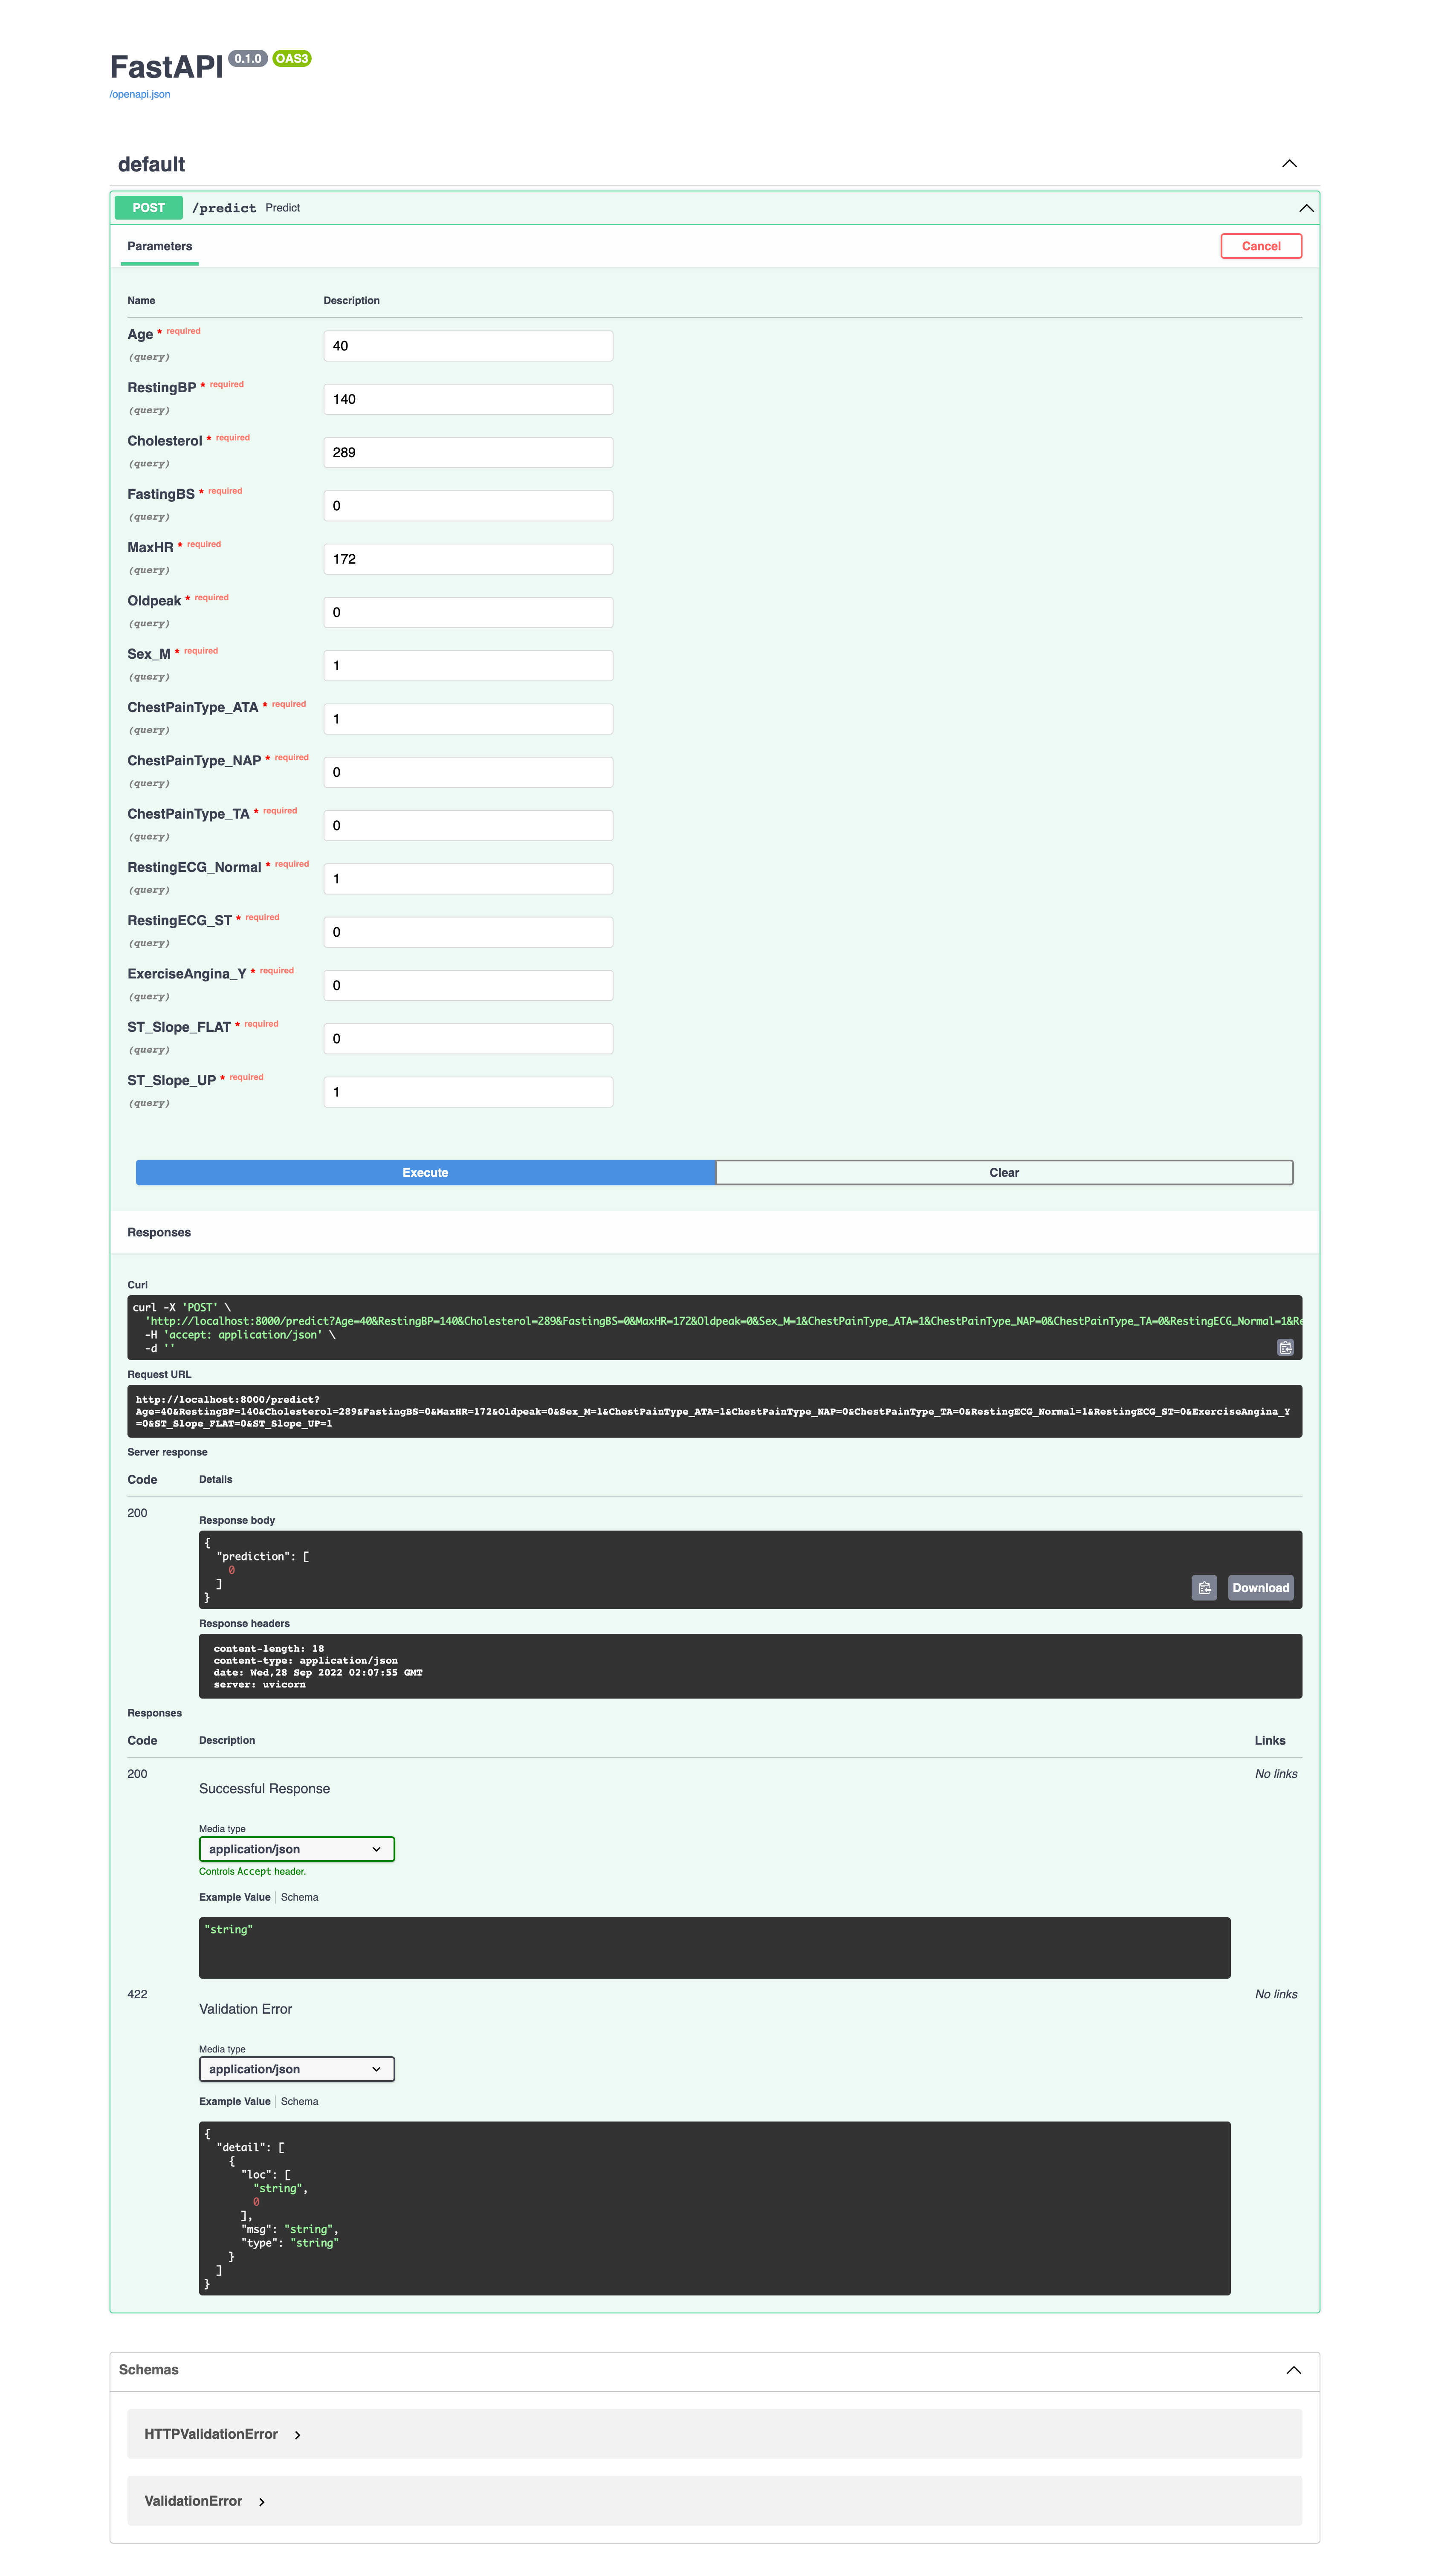

### Create App


In [118]:
#!pip install gradio

In [119]:
create_app(final_model) 

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0      40        140          289          0    172      0.0             0   
1      49        160          180          0    156      1.0             1   
2      37        130          283          0     98      0.0             0   
3      48        138          214          0    108      1.5             1   
4      54        150          195          0    122      0.0             0   
...   ...        ...          ...        ...    ...      ...           ...   
1185   45        110          264          0    132      1.2             1   
1186   68        144          193          1    141      3.4             1   
1187   57        130          131          0    115      1.2             1   
1188   57        130          236          0    174      0.0        

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://29370.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f666dddc490>,
 'http://127.0.0.1:7860/',
 'https://29370.gradio.app')

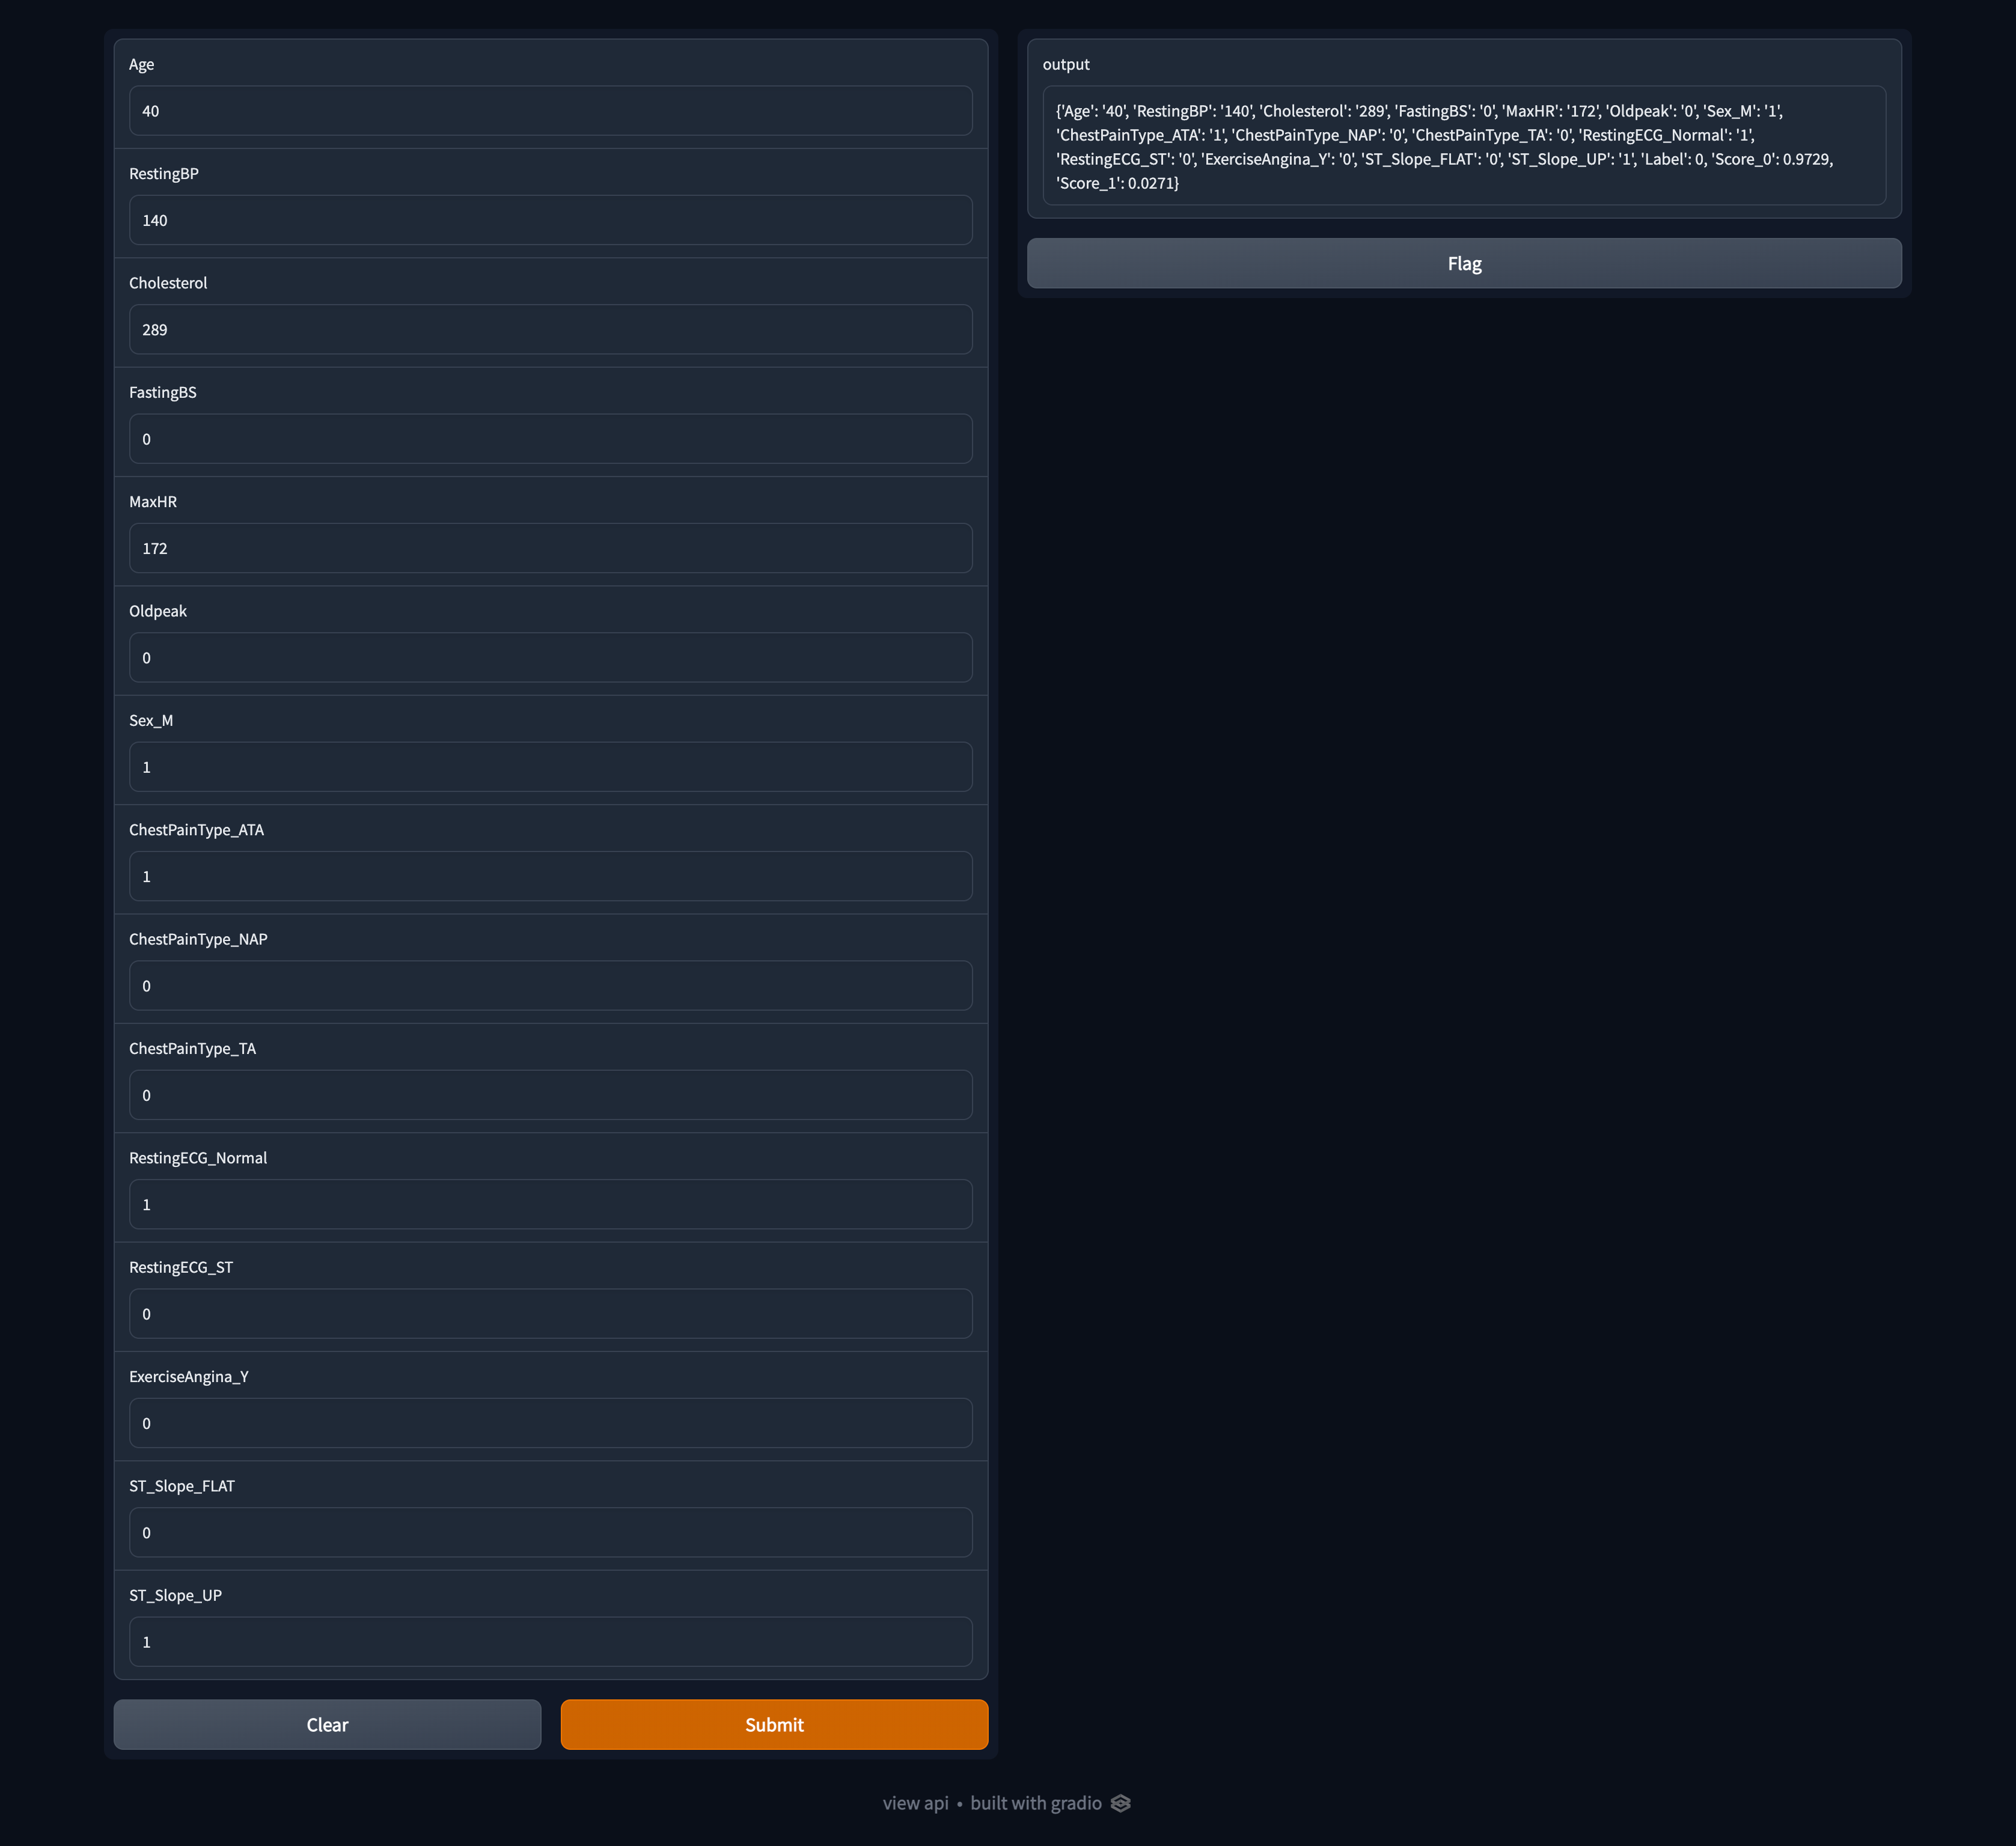